In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def general_dataset_info(dataset):
    print("----------Null Values----------\n", dataset.isnull().sum())
    print("\n----------Duplicate Values----------\n", dataset.duplicated().sum())
    print("\nTotal entries:", len(dataset))

In [3]:
def boxplot_data(dataset):
    for column in dataset.columns:
        plt.figure(figsize=(4, 2))
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.xticks(rotation=90) 
        plt.show()

In [4]:
def histogram_data(dataset):
    for column in dataset.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=dataset, x=column, bins=20, kde=False)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.xticks(rotation=90) 
        plt.show()

## Import Datasets and Preview Data

In [5]:
cpi_url = "https://raw.githubusercontent.com/laurgu/CSI-4124-Term-Project/Part2/Datasets/CPI.csv"
sales_url = "https://raw.githubusercontent.com/laurgu/CSI-4124-Term-Project/Part2/Datasets/CarSales.csv"
features_url = "https://raw.githubusercontent.com/laurgu/CSI-4124-Term-Project/Part2/Datasets/CarFeatures.csv"

cpi = pd.read_csv(cpi_url)
sales = pd.read_csv(sales_url)
features = pd.read_csv(features_url)

In [6]:
cpi.head()

cpi = cpi.rename(columns={'CPIAUCSL': 'CPI'})
cpi.head()

DATE    CPI
0  1947-01-01  21.48
1  1947-02-01  21.62
2  1947-03-01  22.00
3  1947-04-01  22.00
4  1947-05-01  21.95

In [7]:
sales.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [8]:
features.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [9]:
sales.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

## Preprocess CPI Dataset

Check if the dataset has any null or duplicate values.

In [10]:
general_dataset_info(cpi)

----------Null Values----------
 DATE    0
CPI     0
dtype: int64

----------Duplicate Values----------
 0

Total entries: 925


This dataset has no null or duplicate values.

Split "DATE" column into "Year", "Month", "Day" columns and cast these values into ints. Cast the cpi value to a float.

In [11]:
cpi[['Year', 'Month', 'Day']] = cpi['DATE'].str.split('-', expand=True)
cpi.drop(['DATE'], axis=1, inplace=True)
cpi[['Year', 'Month', 'Day']] = cpi[['Year', 'Month', 'Day']].astype(int)
cpi['CPI'] = cpi['CPI'].astype(float)
cpi.head()

CPI  Year  Month  Day
0  21.48  1947      1    1
1  21.62  1947      2    1
2  22.00  1947      3    1
3  22.00  1947      4    1
4  21.95  1947      5    1

Need to like plot without date 

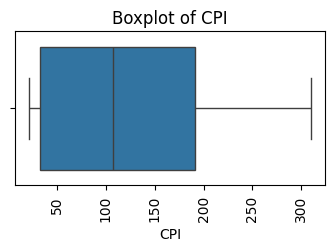

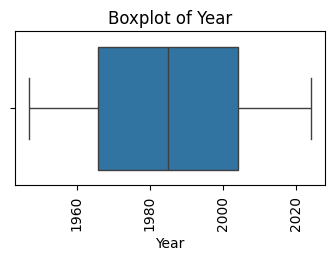

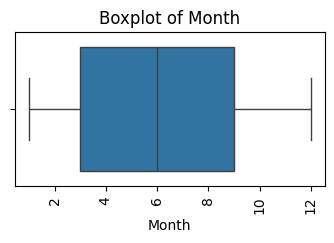

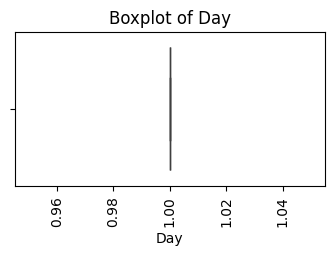

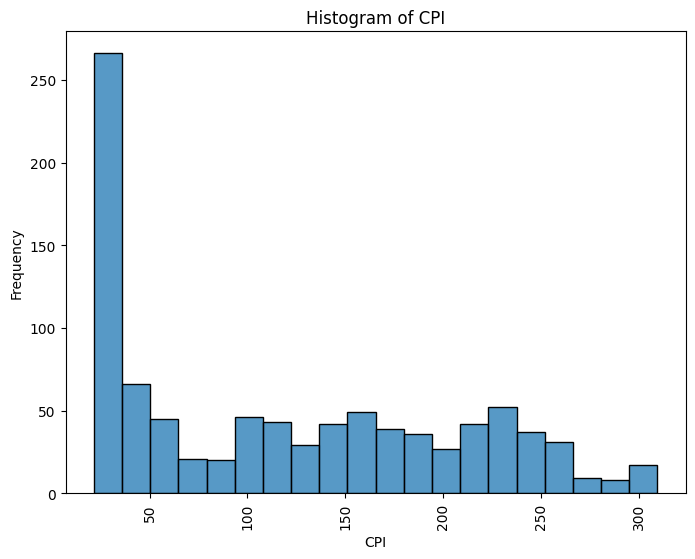

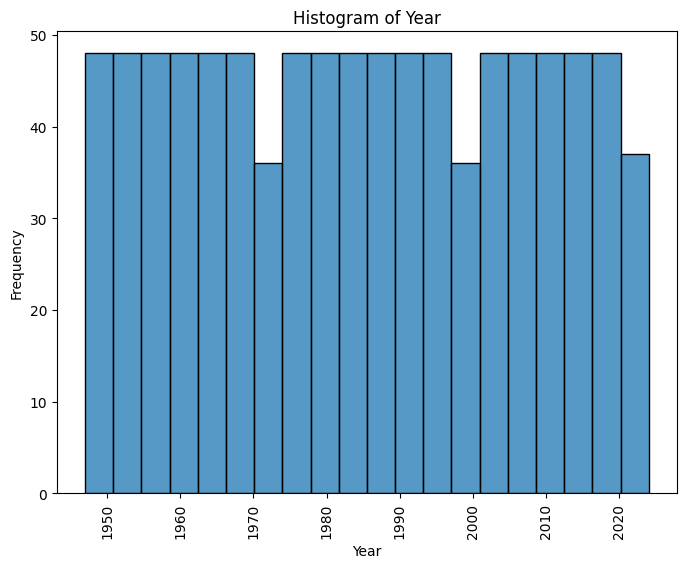

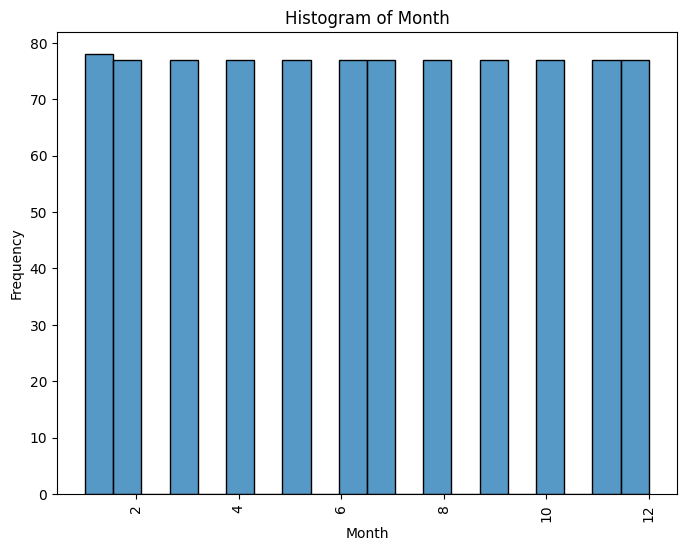

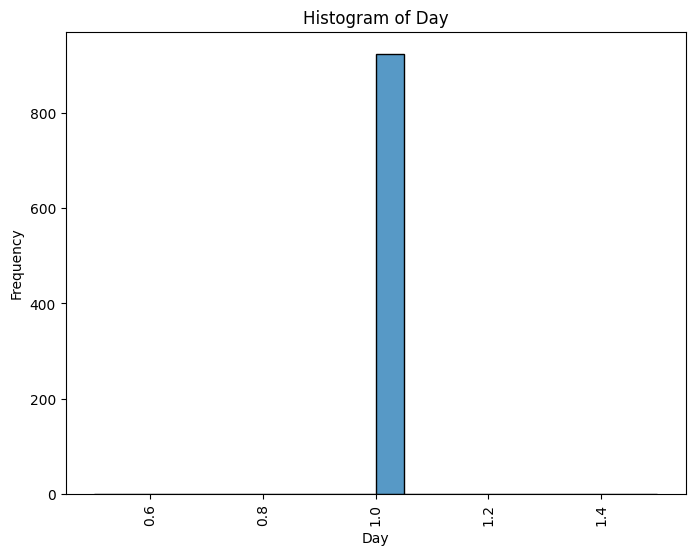

In [12]:
boxplot_data(cpi)
histogram_data(cpi)

## Preprocess Sales Dataset

Check if the dataset has any null or duplicate values.

In [13]:
general_dataset_info(sales)

----------Null Values----------
 Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

----------Duplicate Values----------
 0

Total entries: 23906


There is only one entry where the customer name is NULL. For simplicity, we drop this entry. 

In [14]:
sales = sales.dropna()
sales.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

Split 'Date' column into 'Year', 'Month', 'Day' columns and cast these values as well as 'Annual Income', 'Price', 'Phone' into ints. 

In [15]:
sales[['Month', 'Day', 'Year']] = sales['Date'].str.split('/', expand=True)
sales.drop(['Date'], axis=1, inplace=True)
sales = sales.rename(columns={'Price ($)': 'Price'})
sales[['Year', 'Month', 'Day', 'Annual Income', 'Price', 'Phone']] = sales[['Year', 'Month', 'Day', 'Annual Income', 'Price', 'Phone']].astype(int)
sales.head()

Car_id Customer Name Gender  Annual Income  \
0  C_CND_000001     Geraldine   Male          13500   
1  C_CND_000002           Gia   Male        1480000   
2  C_CND_000003        Gianna   Male        1035000   
3  C_CND_000004       Giselle   Male          13500   
4  C_CND_000005         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black  26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black  19000  60504-7114   
2          Overhead Camshaft       Manual         Red  31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White  14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red  24500  53546-9427   

  Body Style    Phone Dealer_Region  Month  Day  Year  
0        SUV  8264678    Middletown      1    2  2022  
1        SUV  6848189        Aurora      1    2  2022  
2  Passenger  7298798    Greenville      1    2  2022  
3        SUV  6257557         Pasco      1    2  2022  
4  Hatchback  7081483    Janesville      1    2  2022

In [16]:
sales['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

Replace typo with correct spelling of term.

In [17]:
sales.replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft', inplace=True)
sales['Engine'].unique()

array(['Double Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

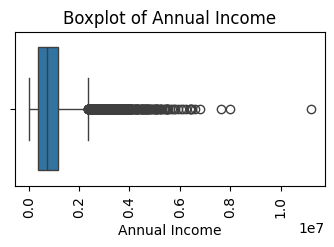

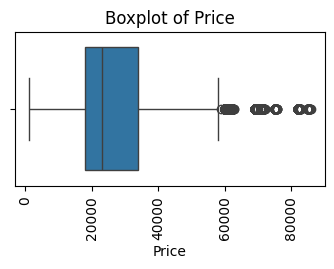

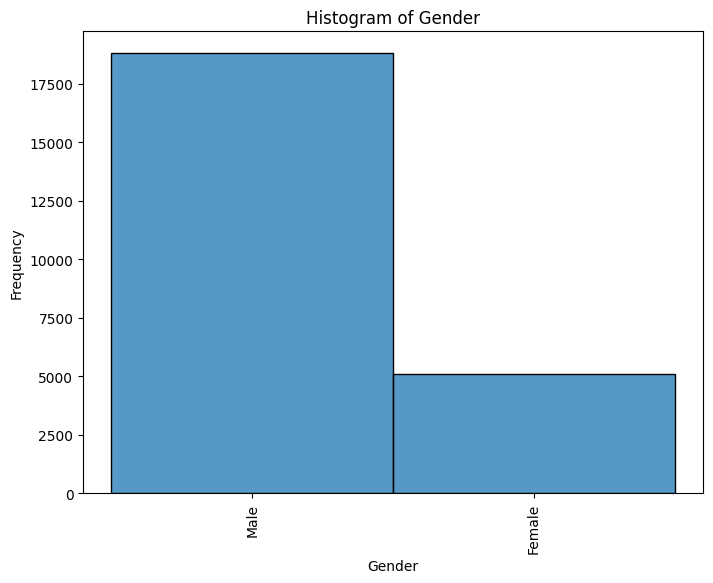

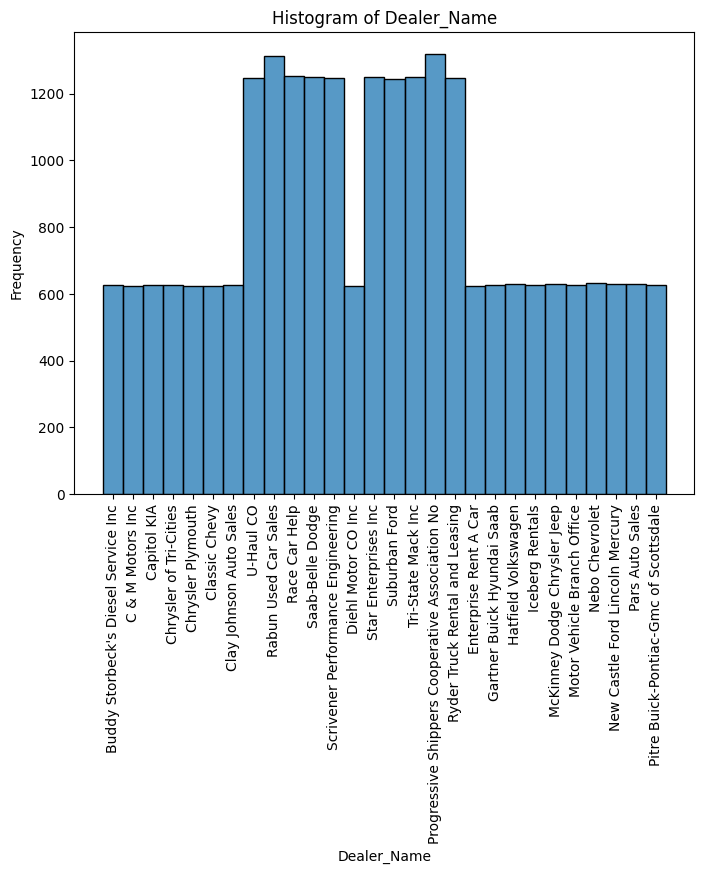

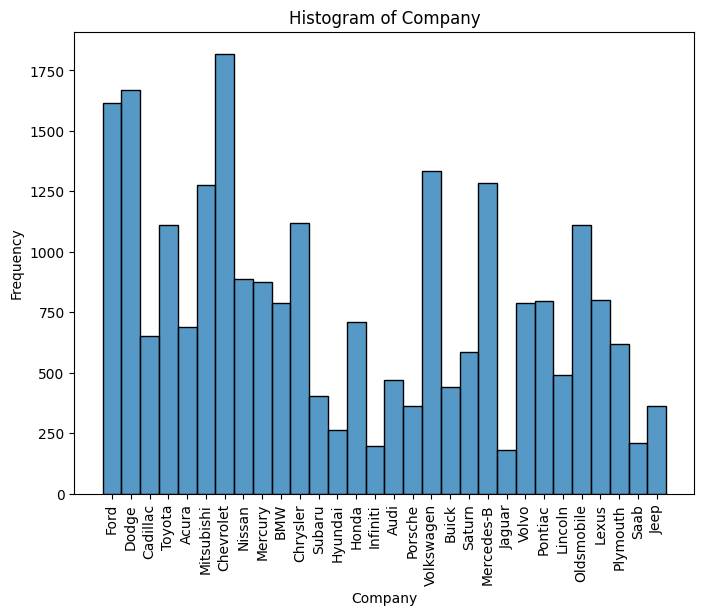

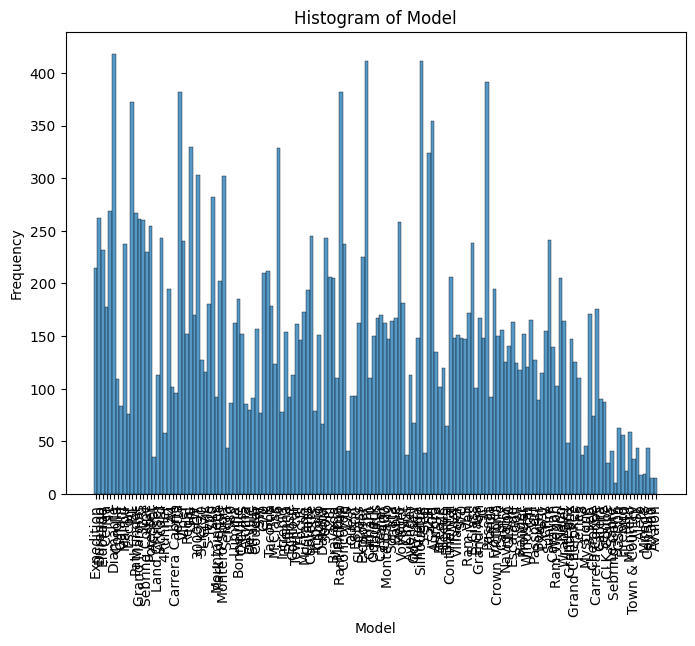

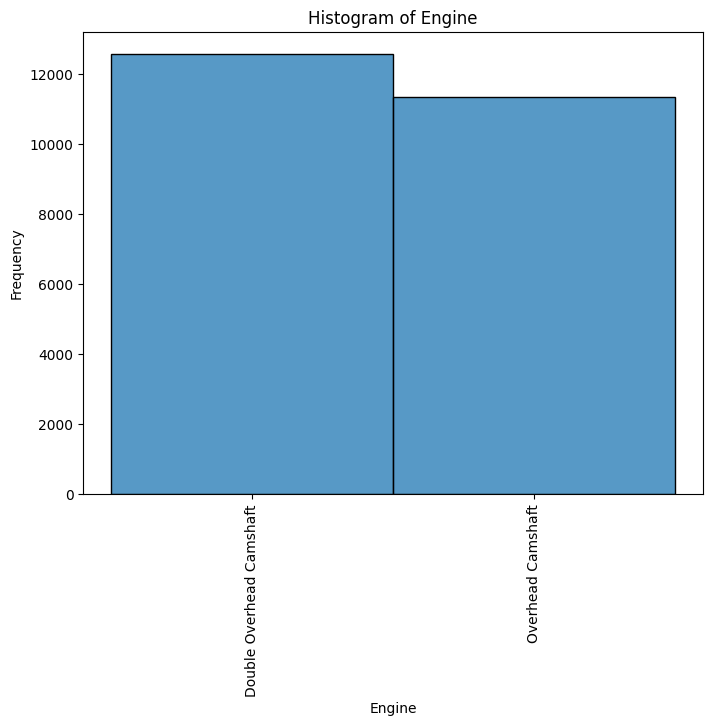

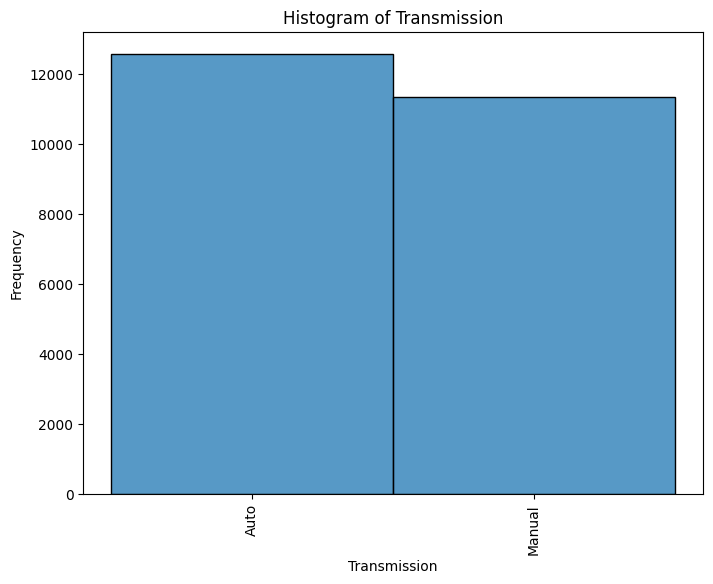

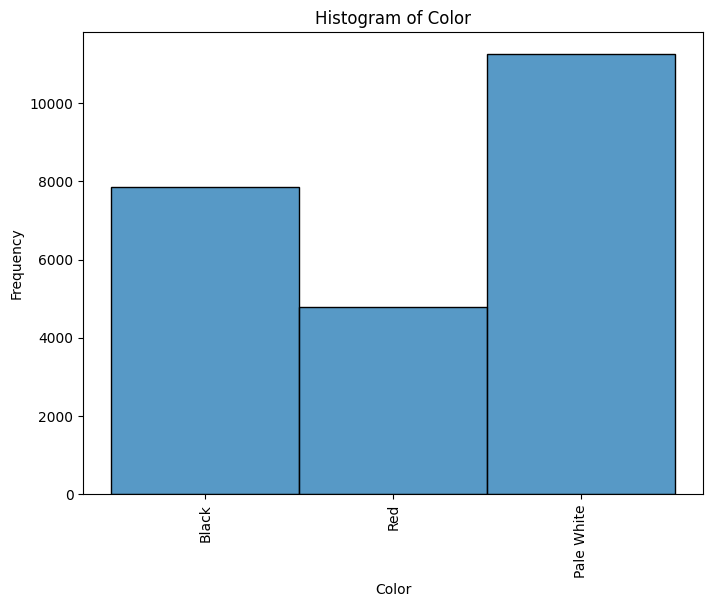

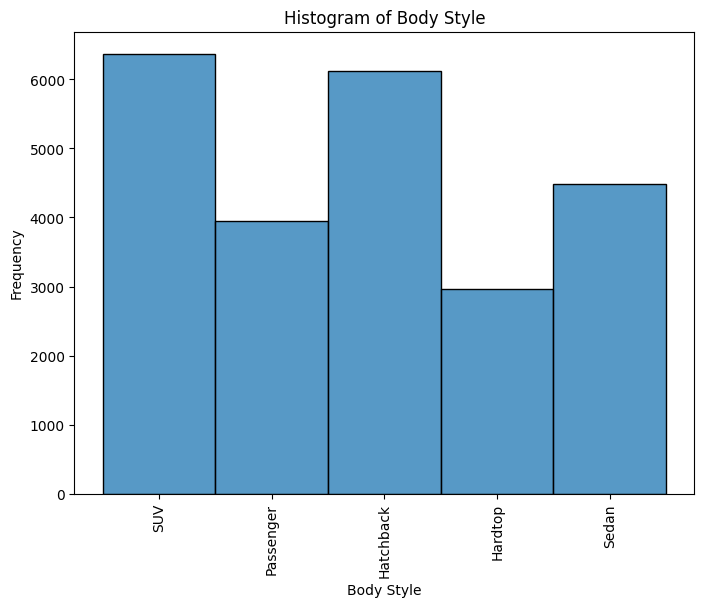

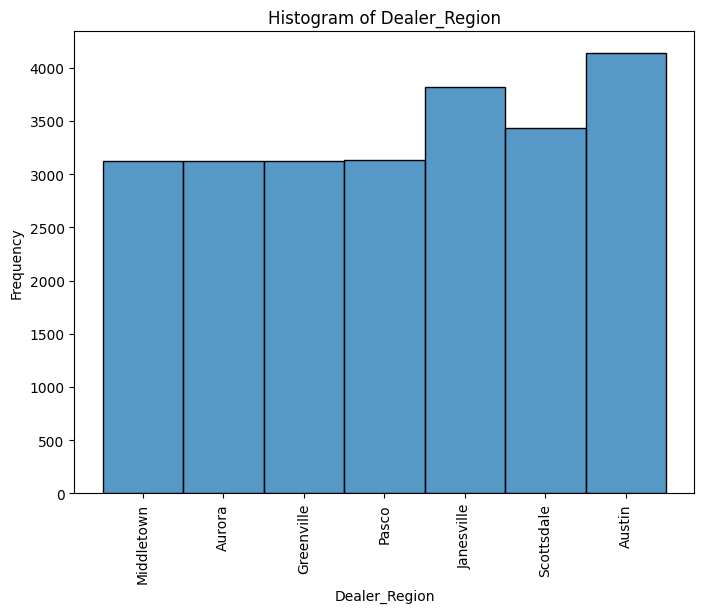

In [18]:
columns = ['Annual Income', 'Price']
sales_reduced = sales[columns]
boxplot_data(sales_reduced)

columns = ['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color','Body Style', 'Dealer_Region']
sales_reduced = sales[columns]
histogram_data(sales_reduced)

In [19]:
sales.describe()

Annual Income         Price         Phone         Month           Day  \
count   2.390500e+04  23905.000000  2.390500e+04  23905.000000  23905.000000   
mean    8.308466e+05  28089.540473  7.497753e+06      7.852792     15.473499   
std     7.200208e+05  14788.592495  8.675080e+05      3.257990      8.734092   
min     1.008000e+04   1200.000000  6.000101e+06      1.000000      1.000000   
25%     3.860000e+05  18001.000000  6.746465e+06      5.000000      8.000000   
50%     7.350000e+05  23000.000000  7.496199e+06      9.000000     15.000000   
75%     1.176000e+06  34000.000000  8.248172e+06     11.000000     23.000000   
max     1.120000e+07  85800.000000  8.999579e+06     12.000000     31.000000   

               Year  
count  23905.000000  
mean    2022.554738  
std        0.497005  
min     2022.000000  
25%     2022.000000  
50%     2023.000000  
75%     2023.000000  
max     2023.000000

## Preprocess Features Dataset

Check if the dataset has any null or duplicate values.

In [20]:
general_dataset_info(features)

----------Null Values----------
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

----------Duplicate Values----------
 715

Total entries: 11914


This dataset has many NULL enteries in the "Market Category" column; too many to drop these enteries. We will drop the "Market Category" column altogether. The nuber of NULL values in "Engine HP" and "Engine Cylinders" is insignificant given the total number of enteries. We will drop these enteries. 

There are several duplicates in this dataset. To address this issue, we will only keep the first occurence of an entry. 

In [21]:
features = features.drop('Market Category', axis=1)
features = features.dropna()
features.drop_duplicates(keep='first', inplace=True)
general_dataset_info(features)

----------Null Values----------
 Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

----------Duplicate Values----------
 0

Total entries: 11092


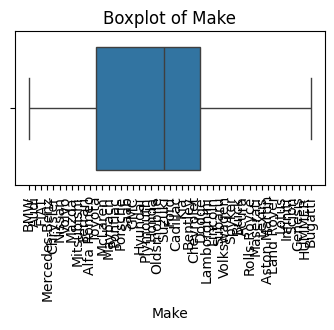

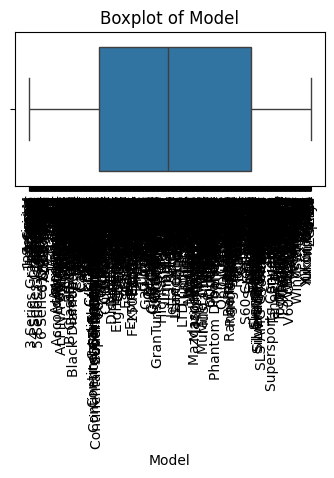

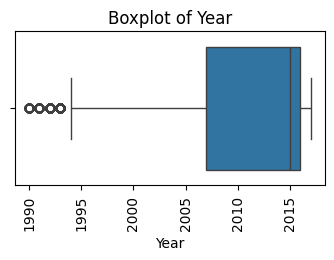

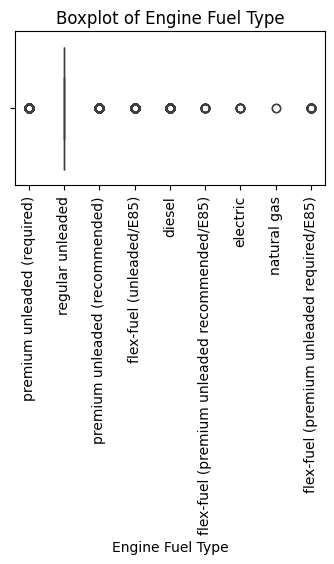

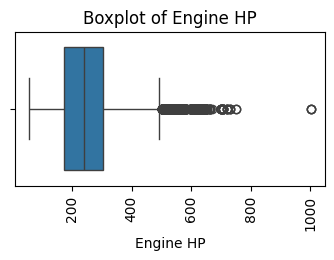

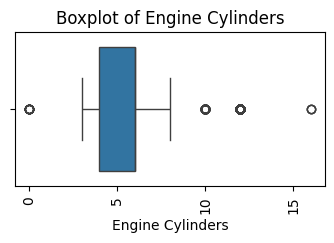

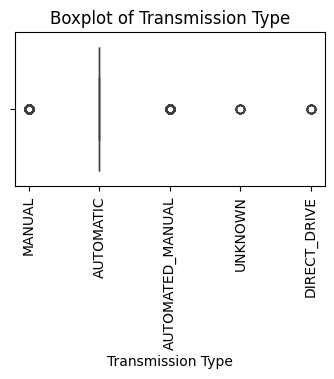

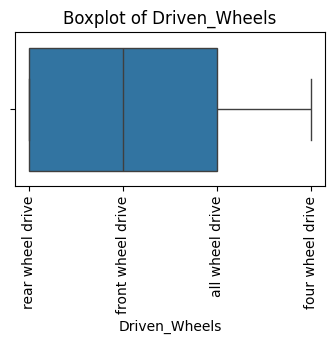

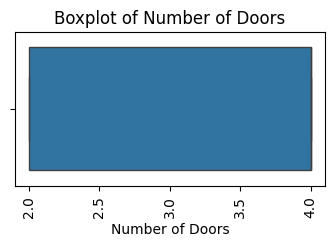

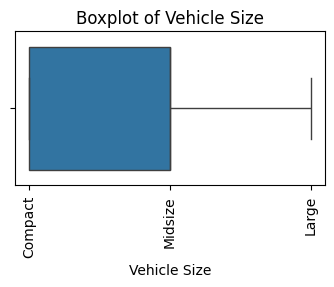

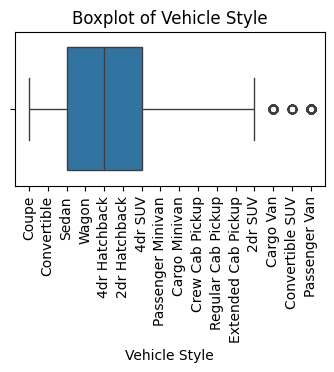

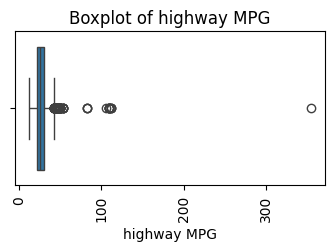

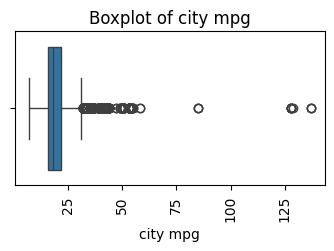

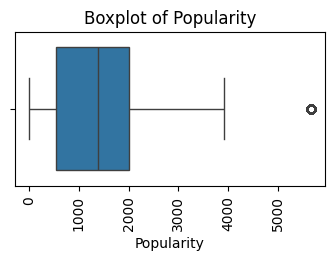

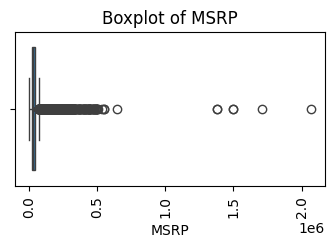

In [22]:
boxplot_data(features)

## Import Into MySql Database

In [47]:
# Create connection
import mysql.connector

connection = mysql.connector.connect(
    user='root',
    password='password',
    host='localhost',
    database='db'
)

# Make sure connection established
if connection.is_connected():
    print("Connected")
else:
    print("Failed to connect")
    
cursor = connection.cursor()

Connected


### CPI

In [48]:
for row in cpi.index:
    query = "INSERT INTO cpi (date, cpi_value) VALUES (%s, %s)"
    insert_values = (str(cpi['Year'][row]) + "-" + str(cpi['Month'][row]) + "-" + str(cpi['Day'][row]), float(cpi['CPI'][row]))
    cursor.execute(query, insert_values)

connection.commit()
cursor.close()

True

### Sales

In [49]:
cursor = connection.cursor()

try:
    #connection.start_transaction()

    for row in sales.index:

        # Build query for date
        print("Insert date")
        
        query = "INSERT INTO date (day, month, year, day_of_week, fiscal_quarter, season) VALUES (%s, %s, %s, %s, %s, %s)"
        insert_values = (int(sales['Day'][row]), int(sales['Month'][row]), int(sales['Year'][row]), "N/A", "N/A", "N/A") # Missing 3 values
        cursor.execute(query, insert_values)
        date_fk = int(cursor.lastrowid)
        
        
        
        # Build query for customer
        print("Insert customer")
        
        query = "INSERT INTO customer (name, gender, annual_income, phone_num) VALUES (%s, %s, %s, %s)"
        insert_values = (str(sales['Customer Name'][row]), str(sales['Gender'][row]), int(sales['Annual Income'][row]), str(sales['Phone'][row]))
        cursor.execute(query, insert_values)
        customer_fk = int(cursor.lastrowid)
        
        
        # Build query for dealer
        print("Insert dealer")
        
        query = "INSERT INTO dealership (name, dealer_num, dealer_region) VALUES (%s, %s, %s)"
        insert_values = (str(sales['Dealer_Name'][row]), str(sales['Dealer_No '][row]), str(sales['Dealer_Region'][row]))
        cursor.execute(query, insert_values)
        dealer_fk = int(cursor.lastrowid)
        
        
        # Find correct row for car information based on model
        #car_data = features[(features['Make'] == 'D') & (features['Model'] == 'X') & (features['Transmission Type'] == 'Y')]
        
        # Build query for car
        print("Insert car")
        
        query = "INSERT INTO car (company, model, engine_type, engine_fuel_type, transmission, color, body_type, engine_horsepower, torque, num_engine_cylinders, drivetrain, num_of_doors, size, highway_mpg, city_mpg) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
        insert_values = (str(sales['Company'][row]), str(sales['Model'][row]), "NA", "NA", "NA", "NA", "NA", 0, 0, 0, "NA", 0, "NA", 0, 0) # Missing 3 values
        cursor.execute(query, insert_values)
        car_fk = int(cursor.lastrowid)
        
        
        
        print(date_fk, customer_fk, dealer_fk, car_fk)
        
    
        query = "INSERT INTO car_sales (car, date, customer, dealer) VALUES (%s, %s, %s, %s)"
        
        insert_values = (car_fk, date_fk, customer_fk, dealer_fk) # Missing 3 values
        cursor.execute(query, insert_values)
        
        car_fk = int(cursor.lastrowid)
        
    connection.commit()

except mysql.connector.Error as err:

    connection.rollback()
    print("Failed")

cursor.close()

Insert date
Insert customer
Insert dealer
Insert car
13919 13919 13919 67649
Insert date
Insert customer
Insert dealer
Insert car
13920 13920 13920 67650
Insert date
Insert customer
Insert dealer
Insert car
13921 13921 13921 67651
Insert date
Insert customer
Insert dealer
Insert car
13922 13922 13922 67652
Insert date
Insert customer
Insert dealer
Insert car
13923 13923 13923 67653
Insert date
Insert customer
Insert dealer
Insert car
13924 13924 13924 67654
Insert date
Insert customer
Insert dealer
Insert car
13925 13925 13925 67655
Insert date
Insert customer
Insert dealer
Insert car
13926 13926 13926 67656
Insert date
Insert customer
Insert dealer
Insert car
13927 13927 13927 67657
Insert date
Insert customer
Insert dealer
Insert car
13928 13928 13928 67658
Insert date
Insert customer
Insert dealer
Insert car
13929 13929 13929 67659
Insert date
Insert customer
Insert dealer
Insert car
13930 13930 13930 67660
Insert date
Insert customer
Insert dealer
Insert car
13931 13931 13931 67661

14081 14081 14081 67811
Insert date
Insert customer
Insert dealer
Insert car
14082 14082 14082 67812
Insert date
Insert customer
Insert dealer
Insert car
14083 14083 14083 67813
Insert date
Insert customer
Insert dealer
Insert car
14084 14084 14084 67814
Insert date
Insert customer
Insert dealer
Insert car
14085 14085 14085 67815
Insert date
Insert customer
Insert dealer
Insert car
14086 14086 14086 67816
Insert date
Insert customer
Insert dealer
Insert car
14087 14087 14087 67817
Insert date
Insert customer
Insert dealer
Insert car
14088 14088 14088 67818
Insert date
Insert customer
Insert dealer
Insert car
14089 14089 14089 67819
Insert date
Insert customer
Insert dealer
Insert car
14090 14090 14090 67820
Insert date
Insert customer
Insert dealer
Insert car
14091 14091 14091 67821
Insert date
Insert customer
Insert dealer
Insert car
14092 14092 14092 67822
Insert date
Insert customer
Insert dealer
Insert car
14093 14093 14093 67823
Insert date
Insert customer
Insert dealer
Insert car

Insert car
14218 14218 14218 67948
Insert date
Insert customer
Insert dealer
Insert car
14219 14219 14219 67949
Insert date
Insert customer
Insert dealer
Insert car
14220 14220 14220 67950
Insert date
Insert customer
Insert dealer
Insert car
14221 14221 14221 67951
Insert date
Insert customer
Insert dealer
Insert car
14222 14222 14222 67952
Insert date
Insert customer
Insert dealer
Insert car
14223 14223 14223 67953
Insert date
Insert customer
Insert dealer
Insert car
14224 14224 14224 67954
Insert date
Insert customer
Insert dealer
Insert car
14225 14225 14225 67955
Insert date
Insert customer
Insert dealer
Insert car
14226 14226 14226 67956
Insert date
Insert customer
Insert dealer
Insert car
14227 14227 14227 67957
Insert date
Insert customer
Insert dealer
Insert car
14228 14228 14228 67958
Insert date
Insert customer
Insert dealer
Insert car
14229 14229 14229 67959
Insert date
Insert customer
Insert dealer
Insert car
14230 14230 14230 67960
Insert date
Insert customer
Insert dealer

14371 14371 14371 68101
Insert date
Insert customer
Insert dealer
Insert car
14372 14372 14372 68102
Insert date
Insert customer
Insert dealer
Insert car
14373 14373 14373 68103
Insert date
Insert customer
Insert dealer
Insert car
14374 14374 14374 68104
Insert date
Insert customer
Insert dealer
Insert car
14375 14375 14375 68105
Insert date
Insert customer
Insert dealer
Insert car
14376 14376 14376 68106
Insert date
Insert customer
Insert dealer
Insert car
14377 14377 14377 68107
Insert date
Insert customer
Insert dealer
Insert car
14378 14378 14378 68108
Insert date
Insert customer
Insert dealer
Insert car
14379 14379 14379 68109
Insert date
Insert customer
Insert dealer
Insert car
14380 14380 14380 68110
Insert date
Insert customer
Insert dealer
Insert car
14381 14381 14381 68111
Insert date
Insert customer
Insert dealer
Insert car
14382 14382 14382 68112
Insert date
Insert customer
Insert dealer
Insert car
14383 14383 14383 68113
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
14536 14536 14536 68266
Insert date
Insert customer
Insert dealer
Insert car
14537 14537 14537 68267
Insert date
Insert customer
Insert dealer
Insert car
14538 14538 14538 68268
Insert date
Insert customer
Insert dealer
Insert car
14539 14539 14539 68269
Insert date
Insert customer
Insert dealer
Insert car
14540 14540 14540 68270
Insert date
Insert customer
Insert dealer
Insert car
14541 14541 14541 68271
Insert date
Insert customer
Insert dealer
Insert car
14542 14542 14542 68272
Insert date
Insert customer
Insert dealer
Insert car
14543 14543 14543 68273
Insert date
Insert customer
Insert dealer
Insert car
14544 14544 14544 68274
Insert date
Insert customer
Insert dealer
Insert car
14545 14545 14545 68275
Insert date
Insert customer
Insert dealer
Insert car
14546 14546 14546 68276
Insert date
Insert customer
Insert dealer
Insert car
14547 14547 14547 68277
Insert date
Insert customer
Insert dealer
Insert car
14548 14548 14548 68278
Insert date

Insert dealer
Insert car
14787 14787 14787 68517
Insert date
Insert customer
Insert dealer
Insert car
14788 14788 14788 68518
Insert date
Insert customer
Insert dealer
Insert car
14789 14789 14789 68519
Insert date
Insert customer
Insert dealer
Insert car
14790 14790 14790 68520
Insert date
Insert customer
Insert dealer
Insert car
14791 14791 14791 68521
Insert date
Insert customer
Insert dealer
Insert car
14792 14792 14792 68522
Insert date
Insert customer
Insert dealer
Insert car
14793 14793 14793 68523
Insert date
Insert customer
Insert dealer
Insert car
14794 14794 14794 68524
Insert date
Insert customer
Insert dealer
Insert car
14795 14795 14795 68525
Insert date
Insert customer
Insert dealer
Insert car
14796 14796 14796 68526
Insert date
Insert customer
Insert dealer
Insert car
14797 14797 14797 68527
Insert date
Insert customer
Insert dealer
Insert car
14798 14798 14798 68528
Insert date
Insert customer
Insert dealer
Insert car
14799 14799 14799 68529
Insert date
Insert customer

Insert car
14960 14960 14960 68690
Insert date
Insert customer
Insert dealer
Insert car
14961 14961 14961 68691
Insert date
Insert customer
Insert dealer
Insert car
14962 14962 14962 68692
Insert date
Insert customer
Insert dealer
Insert car
14963 14963 14963 68693
Insert date
Insert customer
Insert dealer
Insert car
14964 14964 14964 68694
Insert date
Insert customer
Insert dealer
Insert car
14965 14965 14965 68695
Insert date
Insert customer
Insert dealer
Insert car
14966 14966 14966 68696
Insert date
Insert customer
Insert dealer
Insert car
14967 14967 14967 68697
Insert date
Insert customer
Insert dealer
Insert car
14968 14968 14968 68698
Insert date
Insert customer
Insert dealer
Insert car
14969 14969 14969 68699
Insert date
Insert customer
Insert dealer
Insert car
14970 14970 14970 68700
Insert date
Insert customer
Insert dealer
Insert car
14971 14971 14971 68701
Insert date
Insert customer
Insert dealer
Insert car
14972 14972 14972 68702
Insert date
Insert customer
Insert dealer

15134 15134 15134 68864
Insert date
Insert customer
Insert dealer
Insert car
15135 15135 15135 68865
Insert date
Insert customer
Insert dealer
Insert car
15136 15136 15136 68866
Insert date
Insert customer
Insert dealer
Insert car
15137 15137 15137 68867
Insert date
Insert customer
Insert dealer
Insert car
15138 15138 15138 68868
Insert date
Insert customer
Insert dealer
Insert car
15139 15139 15139 68869
Insert date
Insert customer
Insert dealer
Insert car
15140 15140 15140 68870
Insert date
Insert customer
Insert dealer
Insert car
15141 15141 15141 68871
Insert date
Insert customer
Insert dealer
Insert car
15142 15142 15142 68872
Insert date
Insert customer
Insert dealer
Insert car
15143 15143 15143 68873
Insert date
Insert customer
Insert dealer
Insert car
15144 15144 15144 68874
Insert date
Insert customer
Insert dealer
Insert car
15145 15145 15145 68875
Insert date
Insert customer
Insert dealer
Insert car
15146 15146 15146 68876
Insert date
Insert customer
Insert dealer
Insert car

15299 15299 15299 69029
Insert date
Insert customer
Insert dealer
Insert car
15300 15300 15300 69030
Insert date
Insert customer
Insert dealer
Insert car
15301 15301 15301 69031
Insert date
Insert customer
Insert dealer
Insert car
15302 15302 15302 69032
Insert date
Insert customer
Insert dealer
Insert car
15303 15303 15303 69033
Insert date
Insert customer
Insert dealer
Insert car
15304 15304 15304 69034
Insert date
Insert customer
Insert dealer
Insert car
15305 15305 15305 69035
Insert date
Insert customer
Insert dealer
Insert car
15306 15306 15306 69036
Insert date
Insert customer
Insert dealer
Insert car
15307 15307 15307 69037
Insert date
Insert customer
Insert dealer
Insert car
15308 15308 15308 69038
Insert date
Insert customer
Insert dealer
Insert car
15309 15309 15309 69039
Insert date
Insert customer
Insert dealer
Insert car
15310 15310 15310 69040
Insert date
Insert customer
Insert dealer
Insert car
15311 15311 15311 69041
Insert date
Insert customer
Insert dealer
Insert car

Insert car
15469 15469 15469 69199
Insert date
Insert customer
Insert dealer
Insert car
15470 15470 15470 69200
Insert date
Insert customer
Insert dealer
Insert car
15471 15471 15471 69201
Insert date
Insert customer
Insert dealer
Insert car
15472 15472 15472 69202
Insert date
Insert customer
Insert dealer
Insert car
15473 15473 15473 69203
Insert date
Insert customer
Insert dealer
Insert car
15474 15474 15474 69204
Insert date
Insert customer
Insert dealer
Insert car
15475 15475 15475 69205
Insert date
Insert customer
Insert dealer
Insert car
15476 15476 15476 69206
Insert date
Insert customer
Insert dealer
Insert car
15477 15477 15477 69207
Insert date
Insert customer
Insert dealer
Insert car
15478 15478 15478 69208
Insert date
Insert customer
Insert dealer
Insert car
15479 15479 15479 69209
Insert date
Insert customer
Insert dealer
Insert car
15480 15480 15480 69210
Insert date
Insert customer
Insert dealer
Insert car
15481 15481 15481 69211
Insert date
Insert customer
Insert dealer

15629 15629 15629 69359
Insert date
Insert customer
Insert dealer
Insert car
15630 15630 15630 69360
Insert date
Insert customer
Insert dealer
Insert car
15631 15631 15631 69361
Insert date
Insert customer
Insert dealer
Insert car
15632 15632 15632 69362
Insert date
Insert customer
Insert dealer
Insert car
15633 15633 15633 69363
Insert date
Insert customer
Insert dealer
Insert car
15634 15634 15634 69364
Insert date
Insert customer
Insert dealer
Insert car
15635 15635 15635 69365
Insert date
Insert customer
Insert dealer
Insert car
15636 15636 15636 69366
Insert date
Insert customer
Insert dealer
Insert car
15637 15637 15637 69367
Insert date
Insert customer
Insert dealer
Insert car
15638 15638 15638 69368
Insert date
Insert customer
Insert dealer
Insert car
15639 15639 15639 69369
Insert date
Insert customer
Insert dealer
Insert car
15640 15640 15640 69370
Insert date
Insert customer
Insert dealer
Insert car
15641 15641 15641 69371
Insert date
Insert customer
Insert dealer
Insert car

Insert car
15813 15813 15813 69543
Insert date
Insert customer
Insert dealer
Insert car
15814 15814 15814 69544
Insert date
Insert customer
Insert dealer
Insert car
15815 15815 15815 69545
Insert date
Insert customer
Insert dealer
Insert car
15816 15816 15816 69546
Insert date
Insert customer
Insert dealer
Insert car
15817 15817 15817 69547
Insert date
Insert customer
Insert dealer
Insert car
15818 15818 15818 69548
Insert date
Insert customer
Insert dealer
Insert car
15819 15819 15819 69549
Insert date
Insert customer
Insert dealer
Insert car
15820 15820 15820 69550
Insert date
Insert customer
Insert dealer
Insert car
15821 15821 15821 69551
Insert date
Insert customer
Insert dealer
Insert car
15822 15822 15822 69552
Insert date
Insert customer
Insert dealer
Insert car
15823 15823 15823 69553
Insert date
Insert customer
Insert dealer
Insert car
15824 15824 15824 69554
Insert date
Insert customer
Insert dealer
Insert car
15825 15825 15825 69555
Insert date
Insert customer
Insert dealer

15991 15991 15991 69721
Insert date
Insert customer
Insert dealer
Insert car
15992 15992 15992 69722
Insert date
Insert customer
Insert dealer
Insert car
15993 15993 15993 69723
Insert date
Insert customer
Insert dealer
Insert car
15994 15994 15994 69724
Insert date
Insert customer
Insert dealer
Insert car
15995 15995 15995 69725
Insert date
Insert customer
Insert dealer
Insert car
15996 15996 15996 69726
Insert date
Insert customer
Insert dealer
Insert car
15997 15997 15997 69727
Insert date
Insert customer
Insert dealer
Insert car
15998 15998 15998 69728
Insert date
Insert customer
Insert dealer
Insert car
15999 15999 15999 69729
Insert date
Insert customer
Insert dealer
Insert car
16000 16000 16000 69730
Insert date
Insert customer
Insert dealer
Insert car
16001 16001 16001 69731
Insert date
Insert customer
Insert dealer
Insert car
16002 16002 16002 69732
Insert date
Insert customer
Insert dealer
Insert car
16003 16003 16003 69733
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
16155 16155 16155 69885
Insert date
Insert customer
Insert dealer
Insert car
16156 16156 16156 69886
Insert date
Insert customer
Insert dealer
Insert car
16157 16157 16157 69887
Insert date
Insert customer
Insert dealer
Insert car
16158 16158 16158 69888
Insert date
Insert customer
Insert dealer
Insert car
16159 16159 16159 69889
Insert date
Insert customer
Insert dealer
Insert car
16160 16160 16160 69890
Insert date
Insert customer
Insert dealer
Insert car
16161 16161 16161 69891
Insert date
Insert customer
Insert dealer
Insert car
16162 16162 16162 69892
Insert date
Insert customer
Insert dealer
Insert car
16163 16163 16163 69893
Insert date
Insert customer
Insert dealer
Insert car
16164 16164 16164 69894
Insert date
Insert customer
Insert dealer
Insert car
16165 16165 16165 69895
Insert date
Insert customer
Insert dealer
Insert car
16166 16166 16166 69896
Insert date
Insert customer
Insert dealer
Insert car
16167 16167 16167 69897
Insert date

16336 16336 16336 70066
Insert date
Insert customer
Insert dealer
Insert car
16337 16337 16337 70067
Insert date
Insert customer
Insert dealer
Insert car
16338 16338 16338 70068
Insert date
Insert customer
Insert dealer
Insert car
16339 16339 16339 70069
Insert date
Insert customer
Insert dealer
Insert car
16340 16340 16340 70070
Insert date
Insert customer
Insert dealer
Insert car
16341 16341 16341 70071
Insert date
Insert customer
Insert dealer
Insert car
16342 16342 16342 70072
Insert date
Insert customer
Insert dealer
Insert car
16343 16343 16343 70073
Insert date
Insert customer
Insert dealer
Insert car
16344 16344 16344 70074
Insert date
Insert customer
Insert dealer
Insert car
16345 16345 16345 70075
Insert date
Insert customer
Insert dealer
Insert car
16346 16346 16346 70076
Insert date
Insert customer
Insert dealer
Insert car
16347 16347 16347 70077
Insert date
Insert customer
Insert dealer
Insert car
16348 16348 16348 70078
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
16497 16497 16497 70227
Insert date
Insert customer
Insert dealer
Insert car
16498 16498 16498 70228
Insert date
Insert customer
Insert dealer
Insert car
16499 16499 16499 70229
Insert date
Insert customer
Insert dealer
Insert car
16500 16500 16500 70230
Insert date
Insert customer
Insert dealer
Insert car
16501 16501 16501 70231
Insert date
Insert customer
Insert dealer
Insert car
16502 16502 16502 70232
Insert date
Insert customer
Insert dealer
Insert car
16503 16503 16503 70233
Insert date
Insert customer
Insert dealer
Insert car
16504 16504 16504 70234
Insert date
Insert customer
Insert dealer
Insert car
16505 16505 16505 70235
Insert date
Insert customer
Insert dealer
Insert car
16506 16506 16506 70236
Insert date
Insert customer
Insert dealer
Insert car
16507 16507 16507 70237
Insert date
Insert customer
Insert dealer
Insert car
16508 16508 16508 70238
Insert date
Insert customer
Insert dealer
Insert car
16509 16509 16509 70239
Insert date

Insert customer
Insert dealer
Insert car
16668 16668 16668 70398
Insert date
Insert customer
Insert dealer
Insert car
16669 16669 16669 70399
Insert date
Insert customer
Insert dealer
Insert car
16670 16670 16670 70400
Insert date
Insert customer
Insert dealer
Insert car
16671 16671 16671 70401
Insert date
Insert customer
Insert dealer
Insert car
16672 16672 16672 70402
Insert date
Insert customer
Insert dealer
Insert car
16673 16673 16673 70403
Insert date
Insert customer
Insert dealer
Insert car
16674 16674 16674 70404
Insert date
Insert customer
Insert dealer
Insert car
16675 16675 16675 70405
Insert date
Insert customer
Insert dealer
Insert car
16676 16676 16676 70406
Insert date
Insert customer
Insert dealer
Insert car
16677 16677 16677 70407
Insert date
Insert customer
Insert dealer
Insert car
16678 16678 16678 70408
Insert date
Insert customer
Insert dealer
Insert car
16679 16679 16679 70409
Insert date
Insert customer
Insert dealer
Insert car
16680 16680 16680 70410
Insert date

Insert customer
Insert dealer
Insert car
16835 16835 16835 70565
Insert date
Insert customer
Insert dealer
Insert car
16836 16836 16836 70566
Insert date
Insert customer
Insert dealer
Insert car
16837 16837 16837 70567
Insert date
Insert customer
Insert dealer
Insert car
16838 16838 16838 70568
Insert date
Insert customer
Insert dealer
Insert car
16839 16839 16839 70569
Insert date
Insert customer
Insert dealer
Insert car
16840 16840 16840 70570
Insert date
Insert customer
Insert dealer
Insert car
16841 16841 16841 70571
Insert date
Insert customer
Insert dealer
Insert car
16842 16842 16842 70572
Insert date
Insert customer
Insert dealer
Insert car
16843 16843 16843 70573
Insert date
Insert customer
Insert dealer
Insert car
16844 16844 16844 70574
Insert date
Insert customer
Insert dealer
Insert car
16845 16845 16845 70575
Insert date
Insert customer
Insert dealer
Insert car
16846 16846 16846 70576
Insert date
Insert customer
Insert dealer
Insert car
16847 16847 16847 70577
Insert date

Insert car
17001 17001 17001 70731
Insert date
Insert customer
Insert dealer
Insert car
17002 17002 17002 70732
Insert date
Insert customer
Insert dealer
Insert car
17003 17003 17003 70733
Insert date
Insert customer
Insert dealer
Insert car
17004 17004 17004 70734
Insert date
Insert customer
Insert dealer
Insert car
17005 17005 17005 70735
Insert date
Insert customer
Insert dealer
Insert car
17006 17006 17006 70736
Insert date
Insert customer
Insert dealer
Insert car
17007 17007 17007 70737
Insert date
Insert customer
Insert dealer
Insert car
17008 17008 17008 70738
Insert date
Insert customer
Insert dealer
Insert car
17009 17009 17009 70739
Insert date
Insert customer
Insert dealer
Insert car
17010 17010 17010 70740
Insert date
Insert customer
Insert dealer
Insert car
17011 17011 17011 70741
Insert date
Insert customer
Insert dealer
Insert car
17012 17012 17012 70742
Insert date
Insert customer
Insert dealer
Insert car
17013 17013 17013 70743
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
17173 17173 17173 70903
Insert date
Insert customer
Insert dealer
Insert car
17174 17174 17174 70904
Insert date
Insert customer
Insert dealer
Insert car
17175 17175 17175 70905
Insert date
Insert customer
Insert dealer
Insert car
17176 17176 17176 70906
Insert date
Insert customer
Insert dealer
Insert car
17177 17177 17177 70907
Insert date
Insert customer
Insert dealer
Insert car
17178 17178 17178 70908
Insert date
Insert customer
Insert dealer
Insert car
17179 17179 17179 70909
Insert date
Insert customer
Insert dealer
Insert car
17180 17180 17180 70910
Insert date
Insert customer
Insert dealer
Insert car
17181 17181 17181 70911
Insert date
Insert customer
Insert dealer
Insert car
17182 17182 17182 70912
Insert date
Insert customer
Insert dealer
Insert car
17183 17183 17183 70913
Insert date
Insert customer
Insert dealer
Insert car
17184 17184 17184 70914
Insert date
Insert customer
Insert dealer
Insert car
17185 17185 17185 70915
Insert date
Insert customer

17335 17335 17335 71065
Insert date
Insert customer
Insert dealer
Insert car
17336 17336 17336 71066
Insert date
Insert customer
Insert dealer
Insert car
17337 17337 17337 71067
Insert date
Insert customer
Insert dealer
Insert car
17338 17338 17338 71068
Insert date
Insert customer
Insert dealer
Insert car
17339 17339 17339 71069
Insert date
Insert customer
Insert dealer
Insert car
17340 17340 17340 71070
Insert date
Insert customer
Insert dealer
Insert car
17341 17341 17341 71071
Insert date
Insert customer
Insert dealer
Insert car
17342 17342 17342 71072
Insert date
Insert customer
Insert dealer
Insert car
17343 17343 17343 71073
Insert date
Insert customer
Insert dealer
Insert car
17344 17344 17344 71074
Insert date
Insert customer
Insert dealer
Insert car
17345 17345 17345 71075
Insert date
Insert customer
Insert dealer
Insert car
17346 17346 17346 71076
Insert date
Insert customer
Insert dealer
Insert car
17347 17347 17347 71077
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
17506 17506 17506 71236
Insert date
Insert customer
Insert dealer
Insert car
17507 17507 17507 71237
Insert date
Insert customer
Insert dealer
Insert car
17508 17508 17508 71238
Insert date
Insert customer
Insert dealer
Insert car
17509 17509 17509 71239
Insert date
Insert customer
Insert dealer
Insert car
17510 17510 17510 71240
Insert date
Insert customer
Insert dealer
Insert car
17511 17511 17511 71241
Insert date
Insert customer
Insert dealer
Insert car
17512 17512 17512 71242
Insert date
Insert customer
Insert dealer
Insert car
17513 17513 17513 71243
Insert date
Insert customer
Insert dealer
Insert car
17514 17514 17514 71244
Insert date
Insert customer
Insert dealer
Insert car
17515 17515 17515 71245
Insert date
Insert customer
Insert dealer
Insert car
17516 17516 17516 71246
Insert date
Insert customer
Insert dealer
Insert car
17517 17517 17517 71247
Insert date
Insert customer
Insert dealer
Insert car
17518 17518 17518 71248
Insert date
Insert customer

17672 17672 17672 71402
Insert date
Insert customer
Insert dealer
Insert car
17673 17673 17673 71403
Insert date
Insert customer
Insert dealer
Insert car
17674 17674 17674 71404
Insert date
Insert customer
Insert dealer
Insert car
17675 17675 17675 71405
Insert date
Insert customer
Insert dealer
Insert car
17676 17676 17676 71406
Insert date
Insert customer
Insert dealer
Insert car
17677 17677 17677 71407
Insert date
Insert customer
Insert dealer
Insert car
17678 17678 17678 71408
Insert date
Insert customer
Insert dealer
Insert car
17679 17679 17679 71409
Insert date
Insert customer
Insert dealer
Insert car
17680 17680 17680 71410
Insert date
Insert customer
Insert dealer
Insert car
17681 17681 17681 71411
Insert date
Insert customer
Insert dealer
Insert car
17682 17682 17682 71412
Insert date
Insert customer
Insert dealer
Insert car
17683 17683 17683 71413
Insert date
Insert customer
Insert dealer
Insert car
17684 17684 17684 71414
Insert date
Insert customer
Insert dealer
Insert car

Insert car
17839 17839 17839 71569
Insert date
Insert customer
Insert dealer
Insert car
17840 17840 17840 71570
Insert date
Insert customer
Insert dealer
Insert car
17841 17841 17841 71571
Insert date
Insert customer
Insert dealer
Insert car
17842 17842 17842 71572
Insert date
Insert customer
Insert dealer
Insert car
17843 17843 17843 71573
Insert date
Insert customer
Insert dealer
Insert car
17844 17844 17844 71574
Insert date
Insert customer
Insert dealer
Insert car
17845 17845 17845 71575
Insert date
Insert customer
Insert dealer
Insert car
17846 17846 17846 71576
Insert date
Insert customer
Insert dealer
Insert car
17847 17847 17847 71577
Insert date
Insert customer
Insert dealer
Insert car
17848 17848 17848 71578
Insert date
Insert customer
Insert dealer
Insert car
17849 17849 17849 71579
Insert date
Insert customer
Insert dealer
Insert car
17850 17850 17850 71580
Insert date
Insert customer
Insert dealer
Insert car
17851 17851 17851 71581
Insert date
Insert customer
Insert dealer

Insert car
17965 17965 17965 71695
Insert date
Insert customer
Insert dealer
Insert car
17966 17966 17966 71696
Insert date
Insert customer
Insert dealer
Insert car
17967 17967 17967 71697
Insert date
Insert customer
Insert dealer
Insert car
17968 17968 17968 71698
Insert date
Insert customer
Insert dealer
Insert car
17969 17969 17969 71699
Insert date
Insert customer
Insert dealer
Insert car
17970 17970 17970 71700
Insert date
Insert customer
Insert dealer
Insert car
17971 17971 17971 71701
Insert date
Insert customer
Insert dealer
Insert car
17972 17972 17972 71702
Insert date
Insert customer
Insert dealer
Insert car
17973 17973 17973 71703
Insert date
Insert customer
Insert dealer
Insert car
17974 17974 17974 71704
Insert date
Insert customer
Insert dealer
Insert car
17975 17975 17975 71705
Insert date
Insert customer
Insert dealer
Insert car
17976 17976 17976 71706
Insert date
Insert customer
Insert dealer
Insert car
17977 17977 17977 71707
Insert date
Insert customer
Insert dealer

Insert car
18207 18207 18207 71937
Insert date
Insert customer
Insert dealer
Insert car
18208 18208 18208 71938
Insert date
Insert customer
Insert dealer
Insert car
18209 18209 18209 71939
Insert date
Insert customer
Insert dealer
Insert car
18210 18210 18210 71940
Insert date
Insert customer
Insert dealer
Insert car
18211 18211 18211 71941
Insert date
Insert customer
Insert dealer
Insert car
18212 18212 18212 71942
Insert date
Insert customer
Insert dealer
Insert car
18213 18213 18213 71943
Insert date
Insert customer
Insert dealer
Insert car
18214 18214 18214 71944
Insert date
Insert customer
Insert dealer
Insert car
18215 18215 18215 71945
Insert date
Insert customer
Insert dealer
Insert car
18216 18216 18216 71946
Insert date
Insert customer
Insert dealer
Insert car
18217 18217 18217 71947
Insert date
Insert customer
Insert dealer
Insert car
18218 18218 18218 71948
Insert date
Insert customer
Insert dealer
Insert car
18219 18219 18219 71949
Insert date
Insert customer
Insert dealer

Insert car
18342 18342 18342 72072
Insert date
Insert customer
Insert dealer
Insert car
18343 18343 18343 72073
Insert date
Insert customer
Insert dealer
Insert car
18344 18344 18344 72074
Insert date
Insert customer
Insert dealer
Insert car
18345 18345 18345 72075
Insert date
Insert customer
Insert dealer
Insert car
18346 18346 18346 72076
Insert date
Insert customer
Insert dealer
Insert car
18347 18347 18347 72077
Insert date
Insert customer
Insert dealer
Insert car
18348 18348 18348 72078
Insert date
Insert customer
Insert dealer
Insert car
18349 18349 18349 72079
Insert date
Insert customer
Insert dealer
Insert car
18350 18350 18350 72080
Insert date
Insert customer
Insert dealer
Insert car
18351 18351 18351 72081
Insert date
Insert customer
Insert dealer
Insert car
18352 18352 18352 72082
Insert date
Insert customer
Insert dealer
Insert car
18353 18353 18353 72083
Insert date
Insert customer
Insert dealer
Insert car
18354 18354 18354 72084
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
18494 18494 18494 72224
Insert date
Insert customer
Insert dealer
Insert car
18495 18495 18495 72225
Insert date
Insert customer
Insert dealer
Insert car
18496 18496 18496 72226
Insert date
Insert customer
Insert dealer
Insert car
18497 18497 18497 72227
Insert date
Insert customer
Insert dealer
Insert car
18498 18498 18498 72228
Insert date
Insert customer
Insert dealer
Insert car
18499 18499 18499 72229
Insert date
Insert customer
Insert dealer
Insert car
18500 18500 18500 72230
Insert date
Insert customer
Insert dealer
Insert car
18501 18501 18501 72231
Insert date
Insert customer
Insert dealer
Insert car
18502 18502 18502 72232
Insert date
Insert customer
Insert dealer
Insert car
18503 18503 18503 72233
Insert date
Insert customer
Insert dealer
Insert car
18504 18504 18504 72234
Insert date
Insert customer
Insert dealer
Insert car
18505 18505 18505 72235
Insert date
Insert customer
Insert dealer
Insert car
18506 18506 18506 72236
Insert date
Insert customer

Insert dealer
Insert car
18653 18653 18653 72383
Insert date
Insert customer
Insert dealer
Insert car
18654 18654 18654 72384
Insert date
Insert customer
Insert dealer
Insert car
18655 18655 18655 72385
Insert date
Insert customer
Insert dealer
Insert car
18656 18656 18656 72386
Insert date
Insert customer
Insert dealer
Insert car
18657 18657 18657 72387
Insert date
Insert customer
Insert dealer
Insert car
18658 18658 18658 72388
Insert date
Insert customer
Insert dealer
Insert car
18659 18659 18659 72389
Insert date
Insert customer
Insert dealer
Insert car
18660 18660 18660 72390
Insert date
Insert customer
Insert dealer
Insert car
18661 18661 18661 72391
Insert date
Insert customer
Insert dealer
Insert car
18662 18662 18662 72392
Insert date
Insert customer
Insert dealer
Insert car
18663 18663 18663 72393
Insert date
Insert customer
Insert dealer
Insert car
18664 18664 18664 72394
Insert date
Insert customer
Insert dealer
Insert car
18665 18665 18665 72395
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
18816 18816 18816 72546
Insert date
Insert customer
Insert dealer
Insert car
18817 18817 18817 72547
Insert date
Insert customer
Insert dealer
Insert car
18818 18818 18818 72548
Insert date
Insert customer
Insert dealer
Insert car
18819 18819 18819 72549
Insert date
Insert customer
Insert dealer
Insert car
18820 18820 18820 72550
Insert date
Insert customer
Insert dealer
Insert car
18821 18821 18821 72551
Insert date
Insert customer
Insert dealer
Insert car
18822 18822 18822 72552
Insert date
Insert customer
Insert dealer
Insert car
18823 18823 18823 72553
Insert date
Insert customer
Insert dealer
Insert car
18824 18824 18824 72554
Insert date
Insert customer
Insert dealer
Insert car
18825 18825 18825 72555
Insert date
Insert customer
Insert dealer
Insert car
18826 18826 18826 72556
Insert date
Insert customer
Insert dealer
Insert car
18827 18827 18827 72557
Insert date
Insert customer
Insert dealer
Insert car
18828 18828 18828 72558
Insert date

Insert dealer
Insert car
18983 18983 18983 72713
Insert date
Insert customer
Insert dealer
Insert car
18984 18984 18984 72714
Insert date
Insert customer
Insert dealer
Insert car
18985 18985 18985 72715
Insert date
Insert customer
Insert dealer
Insert car
18986 18986 18986 72716
Insert date
Insert customer
Insert dealer
Insert car
18987 18987 18987 72717
Insert date
Insert customer
Insert dealer
Insert car
18988 18988 18988 72718
Insert date
Insert customer
Insert dealer
Insert car
18989 18989 18989 72719
Insert date
Insert customer
Insert dealer
Insert car
18990 18990 18990 72720
Insert date
Insert customer
Insert dealer
Insert car
18991 18991 18991 72721
Insert date
Insert customer
Insert dealer
Insert car
18992 18992 18992 72722
Insert date
Insert customer
Insert dealer
Insert car
18993 18993 18993 72723
Insert date
Insert customer
Insert dealer
Insert car
18994 18994 18994 72724
Insert date
Insert customer
Insert dealer
Insert car
18995 18995 18995 72725
Insert date
Insert customer

Insert car
19152 19152 19152 72882
Insert date
Insert customer
Insert dealer
Insert car
19153 19153 19153 72883
Insert date
Insert customer
Insert dealer
Insert car
19154 19154 19154 72884
Insert date
Insert customer
Insert dealer
Insert car
19155 19155 19155 72885
Insert date
Insert customer
Insert dealer
Insert car
19156 19156 19156 72886
Insert date
Insert customer
Insert dealer
Insert car
19157 19157 19157 72887
Insert date
Insert customer
Insert dealer
Insert car
19158 19158 19158 72888
Insert date
Insert customer
Insert dealer
Insert car
19159 19159 19159 72889
Insert date
Insert customer
Insert dealer
Insert car
19160 19160 19160 72890
Insert date
Insert customer
Insert dealer
Insert car
19161 19161 19161 72891
Insert date
Insert customer
Insert dealer
Insert car
19162 19162 19162 72892
Insert date
Insert customer
Insert dealer
Insert car
19163 19163 19163 72893
Insert date
Insert customer
Insert dealer
Insert car
19164 19164 19164 72894
Insert date
Insert customer
Insert dealer

Insert customer
Insert dealer
Insert car
19316 19316 19316 73046
Insert date
Insert customer
Insert dealer
Insert car
19317 19317 19317 73047
Insert date
Insert customer
Insert dealer
Insert car
19318 19318 19318 73048
Insert date
Insert customer
Insert dealer
Insert car
19319 19319 19319 73049
Insert date
Insert customer
Insert dealer
Insert car
19320 19320 19320 73050
Insert date
Insert customer
Insert dealer
Insert car
19321 19321 19321 73051
Insert date
Insert customer
Insert dealer
Insert car
19322 19322 19322 73052
Insert date
Insert customer
Insert dealer
Insert car
19323 19323 19323 73053
Insert date
Insert customer
Insert dealer
Insert car
19324 19324 19324 73054
Insert date
Insert customer
Insert dealer
Insert car
19325 19325 19325 73055
Insert date
Insert customer
Insert dealer
Insert car
19326 19326 19326 73056
Insert date
Insert customer
Insert dealer
Insert car
19327 19327 19327 73057
Insert date
Insert customer
Insert dealer
Insert car
19328 19328 19328 73058
Insert date

Insert car
19483 19483 19483 73213
Insert date
Insert customer
Insert dealer
Insert car
19484 19484 19484 73214
Insert date
Insert customer
Insert dealer
Insert car
19485 19485 19485 73215
Insert date
Insert customer
Insert dealer
Insert car
19486 19486 19486 73216
Insert date
Insert customer
Insert dealer
Insert car
19487 19487 19487 73217
Insert date
Insert customer
Insert dealer
Insert car
19488 19488 19488 73218
Insert date
Insert customer
Insert dealer
Insert car
19489 19489 19489 73219
Insert date
Insert customer
Insert dealer
Insert car
19490 19490 19490 73220
Insert date
Insert customer
Insert dealer
Insert car
19491 19491 19491 73221
Insert date
Insert customer
Insert dealer
Insert car
19492 19492 19492 73222
Insert date
Insert customer
Insert dealer
Insert car
19493 19493 19493 73223
Insert date
Insert customer
Insert dealer
Insert car
19494 19494 19494 73224
Insert date
Insert customer
Insert dealer
Insert car
19495 19495 19495 73225
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
19648 19648 19648 73378
Insert date
Insert customer
Insert dealer
Insert car
19649 19649 19649 73379
Insert date
Insert customer
Insert dealer
Insert car
19650 19650 19650 73380
Insert date
Insert customer
Insert dealer
Insert car
19651 19651 19651 73381
Insert date
Insert customer
Insert dealer
Insert car
19652 19652 19652 73382
Insert date
Insert customer
Insert dealer
Insert car
19653 19653 19653 73383
Insert date
Insert customer
Insert dealer
Insert car
19654 19654 19654 73384
Insert date
Insert customer
Insert dealer
Insert car
19655 19655 19655 73385
Insert date
Insert customer
Insert dealer
Insert car
19656 19656 19656 73386
Insert date
Insert customer
Insert dealer
Insert car
19657 19657 19657 73387
Insert date
Insert customer
Insert dealer
Insert car
19658 19658 19658 73388
Insert date
Insert customer
Insert dealer
Insert car
19659 19659 19659 73389
Insert date
Insert customer
Insert dealer
Insert car
19660 19660 19660 73390
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
19807 19807 19807 73537
Insert date
Insert customer
Insert dealer
Insert car
19808 19808 19808 73538
Insert date
Insert customer
Insert dealer
Insert car
19809 19809 19809 73539
Insert date
Insert customer
Insert dealer
Insert car
19810 19810 19810 73540
Insert date
Insert customer
Insert dealer
Insert car
19811 19811 19811 73541
Insert date
Insert customer
Insert dealer
Insert car
19812 19812 19812 73542
Insert date
Insert customer
Insert dealer
Insert car
19813 19813 19813 73543
Insert date
Insert customer
Insert dealer
Insert car
19814 19814 19814 73544
Insert date
Insert customer
Insert dealer
Insert car
19815 19815 19815 73545
Insert date
Insert customer
Insert dealer
Insert car
19816 19816 19816 73546
Insert date
Insert customer
Insert dealer
Insert car
19817 19817 19817 73547
Insert date
Insert customer
Insert dealer
Insert car
19818 19818 19818 73548
Insert date
Insert customer
Insert dealer
Insert car
19819 19819 19819 73549
Insert date

19943 19943 19943 73673
Insert date
Insert customer
Insert dealer
Insert car
19944 19944 19944 73674
Insert date
Insert customer
Insert dealer
Insert car
19945 19945 19945 73675
Insert date
Insert customer
Insert dealer
Insert car
19946 19946 19946 73676
Insert date
Insert customer
Insert dealer
Insert car
19947 19947 19947 73677
Insert date
Insert customer
Insert dealer
Insert car
19948 19948 19948 73678
Insert date
Insert customer
Insert dealer
Insert car
19949 19949 19949 73679
Insert date
Insert customer
Insert dealer
Insert car
19950 19950 19950 73680
Insert date
Insert customer
Insert dealer
Insert car
19951 19951 19951 73681
Insert date
Insert customer
Insert dealer
Insert car
19952 19952 19952 73682
Insert date
Insert customer
Insert dealer
Insert car
19953 19953 19953 73683
Insert date
Insert customer
Insert dealer
Insert car
19954 19954 19954 73684
Insert date
Insert customer
Insert dealer
Insert car
19955 19955 19955 73685
Insert date
Insert customer
Insert dealer
Insert car

20105 20105 20105 73835
Insert date
Insert customer
Insert dealer
Insert car
20106 20106 20106 73836
Insert date
Insert customer
Insert dealer
Insert car
20107 20107 20107 73837
Insert date
Insert customer
Insert dealer
Insert car
20108 20108 20108 73838
Insert date
Insert customer
Insert dealer
Insert car
20109 20109 20109 73839
Insert date
Insert customer
Insert dealer
Insert car
20110 20110 20110 73840
Insert date
Insert customer
Insert dealer
Insert car
20111 20111 20111 73841
Insert date
Insert customer
Insert dealer
Insert car
20112 20112 20112 73842
Insert date
Insert customer
Insert dealer
Insert car
20113 20113 20113 73843
Insert date
Insert customer
Insert dealer
Insert car
20114 20114 20114 73844
Insert date
Insert customer
Insert dealer
Insert car
20115 20115 20115 73845
Insert date
Insert customer
Insert dealer
Insert car
20116 20116 20116 73846
Insert date
Insert customer
Insert dealer
Insert car
20117 20117 20117 73847
Insert date
Insert customer
Insert dealer
Insert car

20281 20281 20281 74011
Insert date
Insert customer
Insert dealer
Insert car
20282 20282 20282 74012
Insert date
Insert customer
Insert dealer
Insert car
20283 20283 20283 74013
Insert date
Insert customer
Insert dealer
Insert car
20284 20284 20284 74014
Insert date
Insert customer
Insert dealer
Insert car
20285 20285 20285 74015
Insert date
Insert customer
Insert dealer
Insert car
20286 20286 20286 74016
Insert date
Insert customer
Insert dealer
Insert car
20287 20287 20287 74017
Insert date
Insert customer
Insert dealer
Insert car
20288 20288 20288 74018
Insert date
Insert customer
Insert dealer
Insert car
20289 20289 20289 74019
Insert date
Insert customer
Insert dealer
Insert car
20290 20290 20290 74020
Insert date
Insert customer
Insert dealer
Insert car
20291 20291 20291 74021
Insert date
Insert customer
Insert dealer
Insert car
20292 20292 20292 74022
Insert date
Insert customer
Insert dealer
Insert car
20293 20293 20293 74023
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
20450 20450 20450 74180
Insert date
Insert customer
Insert dealer
Insert car
20451 20451 20451 74181
Insert date
Insert customer
Insert dealer
Insert car
20452 20452 20452 74182
Insert date
Insert customer
Insert dealer
Insert car
20453 20453 20453 74183
Insert date
Insert customer
Insert dealer
Insert car
20454 20454 20454 74184
Insert date
Insert customer
Insert dealer
Insert car
20455 20455 20455 74185
Insert date
Insert customer
Insert dealer
Insert car
20456 20456 20456 74186
Insert date
Insert customer
Insert dealer
Insert car
20457 20457 20457 74187
Insert date
Insert customer
Insert dealer
Insert car
20458 20458 20458 74188
Insert date
Insert customer
Insert dealer
Insert car
20459 20459 20459 74189
Insert date
Insert customer
Insert dealer
Insert car
20460 20460 20460 74190
Insert date
Insert customer
Insert dealer
Insert car
20461 20461 20461 74191
Insert date
Insert customer
Insert dealer
Insert car
20462 20462 20462 74192
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
20628 20628 20628 74358
Insert date
Insert customer
Insert dealer
Insert car
20629 20629 20629 74359
Insert date
Insert customer
Insert dealer
Insert car
20630 20630 20630 74360
Insert date
Insert customer
Insert dealer
Insert car
20631 20631 20631 74361
Insert date
Insert customer
Insert dealer
Insert car
20632 20632 20632 74362
Insert date
Insert customer
Insert dealer
Insert car
20633 20633 20633 74363
Insert date
Insert customer
Insert dealer
Insert car
20634 20634 20634 74364
Insert date
Insert customer
Insert dealer
Insert car
20635 20635 20635 74365
Insert date
Insert customer
Insert dealer
Insert car
20636 20636 20636 74366
Insert date
Insert customer
Insert dealer
Insert car
20637 20637 20637 74367
Insert date
Insert customer
Insert dealer
Insert car
20638 20638 20638 74368
Insert date
Insert customer
Insert dealer
Insert car
20639 20639 20639 74369
Insert date
Insert customer
Insert dealer
Insert car
20640 20640 20640 74370
Insert date

Insert dealer
Insert car
20793 20793 20793 74523
Insert date
Insert customer
Insert dealer
Insert car
20794 20794 20794 74524
Insert date
Insert customer
Insert dealer
Insert car
20795 20795 20795 74525
Insert date
Insert customer
Insert dealer
Insert car
20796 20796 20796 74526
Insert date
Insert customer
Insert dealer
Insert car
20797 20797 20797 74527
Insert date
Insert customer
Insert dealer
Insert car
20798 20798 20798 74528
Insert date
Insert customer
Insert dealer
Insert car
20799 20799 20799 74529
Insert date
Insert customer
Insert dealer
Insert car
20800 20800 20800 74530
Insert date
Insert customer
Insert dealer
Insert car
20801 20801 20801 74531
Insert date
Insert customer
Insert dealer
Insert car
20802 20802 20802 74532
Insert date
Insert customer
Insert dealer
Insert car
20803 20803 20803 74533
Insert date
Insert customer
Insert dealer
Insert car
20804 20804 20804 74534
Insert date
Insert customer
Insert dealer
Insert car
20805 20805 20805 74535
Insert date
Insert customer

20946 20946 20946 74676
Insert date
Insert customer
Insert dealer
Insert car
20947 20947 20947 74677
Insert date
Insert customer
Insert dealer
Insert car
20948 20948 20948 74678
Insert date
Insert customer
Insert dealer
Insert car
20949 20949 20949 74679
Insert date
Insert customer
Insert dealer
Insert car
20950 20950 20950 74680
Insert date
Insert customer
Insert dealer
Insert car
20951 20951 20951 74681
Insert date
Insert customer
Insert dealer
Insert car
20952 20952 20952 74682
Insert date
Insert customer
Insert dealer
Insert car
20953 20953 20953 74683
Insert date
Insert customer
Insert dealer
Insert car
20954 20954 20954 74684
Insert date
Insert customer
Insert dealer
Insert car
20955 20955 20955 74685
Insert date
Insert customer
Insert dealer
Insert car
20956 20956 20956 74686
Insert date
Insert customer
Insert dealer
Insert car
20957 20957 20957 74687
Insert date
Insert customer
Insert dealer
Insert car
20958 20958 20958 74688
Insert date
Insert customer
Insert dealer
Insert car

Insert car
21111 21111 21111 74841
Insert date
Insert customer
Insert dealer
Insert car
21112 21112 21112 74842
Insert date
Insert customer
Insert dealer
Insert car
21113 21113 21113 74843
Insert date
Insert customer
Insert dealer
Insert car
21114 21114 21114 74844
Insert date
Insert customer
Insert dealer
Insert car
21115 21115 21115 74845
Insert date
Insert customer
Insert dealer
Insert car
21116 21116 21116 74846
Insert date
Insert customer
Insert dealer
Insert car
21117 21117 21117 74847
Insert date
Insert customer
Insert dealer
Insert car
21118 21118 21118 74848
Insert date
Insert customer
Insert dealer
Insert car
21119 21119 21119 74849
Insert date
Insert customer
Insert dealer
Insert car
21120 21120 21120 74850
Insert date
Insert customer
Insert dealer
Insert car
21121 21121 21121 74851
Insert date
Insert customer
Insert dealer
Insert car
21122 21122 21122 74852
Insert date
Insert customer
Insert dealer
Insert car
21123 21123 21123 74853
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
21263 21263 21263 74993
Insert date
Insert customer
Insert dealer
Insert car
21264 21264 21264 74994
Insert date
Insert customer
Insert dealer
Insert car
21265 21265 21265 74995
Insert date
Insert customer
Insert dealer
Insert car
21266 21266 21266 74996
Insert date
Insert customer
Insert dealer
Insert car
21267 21267 21267 74997
Insert date
Insert customer
Insert dealer
Insert car
21268 21268 21268 74998
Insert date
Insert customer
Insert dealer
Insert car
21269 21269 21269 74999
Insert date
Insert customer
Insert dealer
Insert car
21270 21270 21270 75000
Insert date
Insert customer
Insert dealer
Insert car
21271 21271 21271 75001
Insert date
Insert customer
Insert dealer
Insert car
21272 21272 21272 75002
Insert date
Insert customer
Insert dealer
Insert car
21273 21273 21273 75003
Insert date
Insert customer
Insert dealer
Insert car
21274 21274 21274 75004
Insert date
Insert customer
Insert dealer
Insert car
21275 21275 21275 75005
Insert date
Insert customer

21427 21427 21427 75157
Insert date
Insert customer
Insert dealer
Insert car
21428 21428 21428 75158
Insert date
Insert customer
Insert dealer
Insert car
21429 21429 21429 75159
Insert date
Insert customer
Insert dealer
Insert car
21430 21430 21430 75160
Insert date
Insert customer
Insert dealer
Insert car
21431 21431 21431 75161
Insert date
Insert customer
Insert dealer
Insert car
21432 21432 21432 75162
Insert date
Insert customer
Insert dealer
Insert car
21433 21433 21433 75163
Insert date
Insert customer
Insert dealer
Insert car
21434 21434 21434 75164
Insert date
Insert customer
Insert dealer
Insert car
21435 21435 21435 75165
Insert date
Insert customer
Insert dealer
Insert car
21436 21436 21436 75166
Insert date
Insert customer
Insert dealer
Insert car
21437 21437 21437 75167
Insert date
Insert customer
Insert dealer
Insert car
21438 21438 21438 75168
Insert date
Insert customer
Insert dealer
Insert car
21439 21439 21439 75169
Insert date
Insert customer
Insert dealer
Insert car

Insert car
21577 21577 21577 75307
Insert date
Insert customer
Insert dealer
Insert car
21578 21578 21578 75308
Insert date
Insert customer
Insert dealer
Insert car
21579 21579 21579 75309
Insert date
Insert customer
Insert dealer
Insert car
21580 21580 21580 75310
Insert date
Insert customer
Insert dealer
Insert car
21581 21581 21581 75311
Insert date
Insert customer
Insert dealer
Insert car
21582 21582 21582 75312
Insert date
Insert customer
Insert dealer
Insert car
21583 21583 21583 75313
Insert date
Insert customer
Insert dealer
Insert car
21584 21584 21584 75314
Insert date
Insert customer
Insert dealer
Insert car
21585 21585 21585 75315
Insert date
Insert customer
Insert dealer
Insert car
21586 21586 21586 75316
Insert date
Insert customer
Insert dealer
Insert car
21587 21587 21587 75317
Insert date
Insert customer
Insert dealer
Insert car
21588 21588 21588 75318
Insert date
Insert customer
Insert dealer
Insert car
21589 21589 21589 75319
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
21740 21740 21740 75470
Insert date
Insert customer
Insert dealer
Insert car
21741 21741 21741 75471
Insert date
Insert customer
Insert dealer
Insert car
21742 21742 21742 75472
Insert date
Insert customer
Insert dealer
Insert car
21743 21743 21743 75473
Insert date
Insert customer
Insert dealer
Insert car
21744 21744 21744 75474
Insert date
Insert customer
Insert dealer
Insert car
21745 21745 21745 75475
Insert date
Insert customer
Insert dealer
Insert car
21746 21746 21746 75476
Insert date
Insert customer
Insert dealer
Insert car
21747 21747 21747 75477
Insert date
Insert customer
Insert dealer
Insert car
21748 21748 21748 75478
Insert date
Insert customer
Insert dealer
Insert car
21749 21749 21749 75479
Insert date
Insert customer
Insert dealer
Insert car
21750 21750 21750 75480
Insert date
Insert customer
Insert dealer
Insert car
21751 21751 21751 75481
Insert date
Insert customer
Insert dealer
Insert car
21752 21752 21752 75482
Insert date
Insert customer

Insert dealer
Insert car
21904 21904 21904 75634
Insert date
Insert customer
Insert dealer
Insert car
21905 21905 21905 75635
Insert date
Insert customer
Insert dealer
Insert car
21906 21906 21906 75636
Insert date
Insert customer
Insert dealer
Insert car
21907 21907 21907 75637
Insert date
Insert customer
Insert dealer
Insert car
21908 21908 21908 75638
Insert date
Insert customer
Insert dealer
Insert car
21909 21909 21909 75639
Insert date
Insert customer
Insert dealer
Insert car
21910 21910 21910 75640
Insert date
Insert customer
Insert dealer
Insert car
21911 21911 21911 75641
Insert date
Insert customer
Insert dealer
Insert car
21912 21912 21912 75642
Insert date
Insert customer
Insert dealer
Insert car
21913 21913 21913 75643
Insert date
Insert customer
Insert dealer
Insert car
21914 21914 21914 75644
Insert date
Insert customer
Insert dealer
Insert car
21915 21915 21915 75645
Insert date
Insert customer
Insert dealer
Insert car
21916 21916 21916 75646
Insert date
Insert customer

Insert car
22074 22074 22074 75804
Insert date
Insert customer
Insert dealer
Insert car
22075 22075 22075 75805
Insert date
Insert customer
Insert dealer
Insert car
22076 22076 22076 75806
Insert date
Insert customer
Insert dealer
Insert car
22077 22077 22077 75807
Insert date
Insert customer
Insert dealer
Insert car
22078 22078 22078 75808
Insert date
Insert customer
Insert dealer
Insert car
22079 22079 22079 75809
Insert date
Insert customer
Insert dealer
Insert car
22080 22080 22080 75810
Insert date
Insert customer
Insert dealer
Insert car
22081 22081 22081 75811
Insert date
Insert customer
Insert dealer
Insert car
22082 22082 22082 75812
Insert date
Insert customer
Insert dealer
Insert car
22083 22083 22083 75813
Insert date
Insert customer
Insert dealer
Insert car
22084 22084 22084 75814
Insert date
Insert customer
Insert dealer
Insert car
22085 22085 22085 75815
Insert date
Insert customer
Insert dealer
Insert car
22086 22086 22086 75816
Insert date
Insert customer
Insert dealer

Insert customer
Insert dealer
Insert car
22239 22239 22239 75969
Insert date
Insert customer
Insert dealer
Insert car
22240 22240 22240 75970
Insert date
Insert customer
Insert dealer
Insert car
22241 22241 22241 75971
Insert date
Insert customer
Insert dealer
Insert car
22242 22242 22242 75972
Insert date
Insert customer
Insert dealer
Insert car
22243 22243 22243 75973
Insert date
Insert customer
Insert dealer
Insert car
22244 22244 22244 75974
Insert date
Insert customer
Insert dealer
Insert car
22245 22245 22245 75975
Insert date
Insert customer
Insert dealer
Insert car
22246 22246 22246 75976
Insert date
Insert customer
Insert dealer
Insert car
22247 22247 22247 75977
Insert date
Insert customer
Insert dealer
Insert car
22248 22248 22248 75978
Insert date
Insert customer
Insert dealer
Insert car
22249 22249 22249 75979
Insert date
Insert customer
Insert dealer
Insert car
22250 22250 22250 75980
Insert date
Insert customer
Insert dealer
Insert car
22251 22251 22251 75981
Insert date

Insert dealer
Insert car
22410 22410 22410 76140
Insert date
Insert customer
Insert dealer
Insert car
22411 22411 22411 76141
Insert date
Insert customer
Insert dealer
Insert car
22412 22412 22412 76142
Insert date
Insert customer
Insert dealer
Insert car
22413 22413 22413 76143
Insert date
Insert customer
Insert dealer
Insert car
22414 22414 22414 76144
Insert date
Insert customer
Insert dealer
Insert car
22415 22415 22415 76145
Insert date
Insert customer
Insert dealer
Insert car
22416 22416 22416 76146
Insert date
Insert customer
Insert dealer
Insert car
22417 22417 22417 76147
Insert date
Insert customer
Insert dealer
Insert car
22418 22418 22418 76148
Insert date
Insert customer
Insert dealer
Insert car
22419 22419 22419 76149
Insert date
Insert customer
Insert dealer
Insert car
22420 22420 22420 76150
Insert date
Insert customer
Insert dealer
Insert car
22421 22421 22421 76151
Insert date
Insert customer
Insert dealer
Insert car
22422 22422 22422 76152
Insert date
Insert customer

Insert dealer
Insert car
22576 22576 22576 76306
Insert date
Insert customer
Insert dealer
Insert car
22577 22577 22577 76307
Insert date
Insert customer
Insert dealer
Insert car
22578 22578 22578 76308
Insert date
Insert customer
Insert dealer
Insert car
22579 22579 22579 76309
Insert date
Insert customer
Insert dealer
Insert car
22580 22580 22580 76310
Insert date
Insert customer
Insert dealer
Insert car
22581 22581 22581 76311
Insert date
Insert customer
Insert dealer
Insert car
22582 22582 22582 76312
Insert date
Insert customer
Insert dealer
Insert car
22583 22583 22583 76313
Insert date
Insert customer
Insert dealer
Insert car
22584 22584 22584 76314
Insert date
Insert customer
Insert dealer
Insert car
22585 22585 22585 76315
Insert date
Insert customer
Insert dealer
Insert car
22586 22586 22586 76316
Insert date
Insert customer
Insert dealer
Insert car
22587 22587 22587 76317
Insert date
Insert customer
Insert dealer
Insert car
22588 22588 22588 76318
Insert date
Insert customer

Insert car
22746 22746 22746 76476
Insert date
Insert customer
Insert dealer
Insert car
22747 22747 22747 76477
Insert date
Insert customer
Insert dealer
Insert car
22748 22748 22748 76478
Insert date
Insert customer
Insert dealer
Insert car
22749 22749 22749 76479
Insert date
Insert customer
Insert dealer
Insert car
22750 22750 22750 76480
Insert date
Insert customer
Insert dealer
Insert car
22751 22751 22751 76481
Insert date
Insert customer
Insert dealer
Insert car
22752 22752 22752 76482
Insert date
Insert customer
Insert dealer
Insert car
22753 22753 22753 76483
Insert date
Insert customer
Insert dealer
Insert car
22754 22754 22754 76484
Insert date
Insert customer
Insert dealer
Insert car
22755 22755 22755 76485
Insert date
Insert customer
Insert dealer
Insert car
22756 22756 22756 76486
Insert date
Insert customer
Insert dealer
Insert car
22757 22757 22757 76487
Insert date
Insert customer
Insert dealer
Insert car
22758 22758 22758 76488
Insert date
Insert customer
Insert dealer

22929 22929 22929 76659
Insert date
Insert customer
Insert dealer
Insert car
22930 22930 22930 76660
Insert date
Insert customer
Insert dealer
Insert car
22931 22931 22931 76661
Insert date
Insert customer
Insert dealer
Insert car
22932 22932 22932 76662
Insert date
Insert customer
Insert dealer
Insert car
22933 22933 22933 76663
Insert date
Insert customer
Insert dealer
Insert car
22934 22934 22934 76664
Insert date
Insert customer
Insert dealer
Insert car
22935 22935 22935 76665
Insert date
Insert customer
Insert dealer
Insert car
22936 22936 22936 76666
Insert date
Insert customer
Insert dealer
Insert car
22937 22937 22937 76667
Insert date
Insert customer
Insert dealer
Insert car
22938 22938 22938 76668
Insert date
Insert customer
Insert dealer
Insert car
22939 22939 22939 76669
Insert date
Insert customer
Insert dealer
Insert car
22940 22940 22940 76670
Insert date
Insert customer
Insert dealer
Insert car
22941 22941 22941 76671
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
23104 23104 23104 76834
Insert date
Insert customer
Insert dealer
Insert car
23105 23105 23105 76835
Insert date
Insert customer
Insert dealer
Insert car
23106 23106 23106 76836
Insert date
Insert customer
Insert dealer
Insert car
23107 23107 23107 76837
Insert date
Insert customer
Insert dealer
Insert car
23108 23108 23108 76838
Insert date
Insert customer
Insert dealer
Insert car
23109 23109 23109 76839
Insert date
Insert customer
Insert dealer
Insert car
23110 23110 23110 76840
Insert date
Insert customer
Insert dealer
Insert car
23111 23111 23111 76841
Insert date
Insert customer
Insert dealer
Insert car
23112 23112 23112 76842
Insert date
Insert customer
Insert dealer
Insert car
23113 23113 23113 76843
Insert date
Insert customer
Insert dealer
Insert car
23114 23114 23114 76844
Insert date
Insert customer
Insert dealer
Insert car
23115 23115 23115 76845
Insert date
Insert customer
Insert dealer
Insert car
23116 23116 23116 76846
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
23270 23270 23270 77000
Insert date
Insert customer
Insert dealer
Insert car
23271 23271 23271 77001
Insert date
Insert customer
Insert dealer
Insert car
23272 23272 23272 77002
Insert date
Insert customer
Insert dealer
Insert car
23273 23273 23273 77003
Insert date
Insert customer
Insert dealer
Insert car
23274 23274 23274 77004
Insert date
Insert customer
Insert dealer
Insert car
23275 23275 23275 77005
Insert date
Insert customer
Insert dealer
Insert car
23276 23276 23276 77006
Insert date
Insert customer
Insert dealer
Insert car
23277 23277 23277 77007
Insert date
Insert customer
Insert dealer
Insert car
23278 23278 23278 77008
Insert date
Insert customer
Insert dealer
Insert car
23279 23279 23279 77009
Insert date
Insert customer
Insert dealer
Insert car
23280 23280 23280 77010
Insert date
Insert customer
Insert dealer
Insert car
23281 23281 23281 77011
Insert date
Insert customer
Insert dealer
Insert car
23282 23282 23282 77012
Insert date

Insert customer
Insert dealer
Insert car
23435 23435 23435 77165
Insert date
Insert customer
Insert dealer
Insert car
23436 23436 23436 77166
Insert date
Insert customer
Insert dealer
Insert car
23437 23437 23437 77167
Insert date
Insert customer
Insert dealer
Insert car
23438 23438 23438 77168
Insert date
Insert customer
Insert dealer
Insert car
23439 23439 23439 77169
Insert date
Insert customer
Insert dealer
Insert car
23440 23440 23440 77170
Insert date
Insert customer
Insert dealer
Insert car
23441 23441 23441 77171
Insert date
Insert customer
Insert dealer
Insert car
23442 23442 23442 77172
Insert date
Insert customer
Insert dealer
Insert car
23443 23443 23443 77173
Insert date
Insert customer
Insert dealer
Insert car
23444 23444 23444 77174
Insert date
Insert customer
Insert dealer
Insert car
23445 23445 23445 77175
Insert date
Insert customer
Insert dealer
Insert car
23446 23446 23446 77176
Insert date
Insert customer
Insert dealer
Insert car
23447 23447 23447 77177
Insert date

Insert car
23584 23584 23584 77314
Insert date
Insert customer
Insert dealer
Insert car
23585 23585 23585 77315
Insert date
Insert customer
Insert dealer
Insert car
23586 23586 23586 77316
Insert date
Insert customer
Insert dealer
Insert car
23587 23587 23587 77317
Insert date
Insert customer
Insert dealer
Insert car
23588 23588 23588 77318
Insert date
Insert customer
Insert dealer
Insert car
23589 23589 23589 77319
Insert date
Insert customer
Insert dealer
Insert car
23590 23590 23590 77320
Insert date
Insert customer
Insert dealer
Insert car
23591 23591 23591 77321
Insert date
Insert customer
Insert dealer
Insert car
23592 23592 23592 77322
Insert date
Insert customer
Insert dealer
Insert car
23593 23593 23593 77323
Insert date
Insert customer
Insert dealer
Insert car
23594 23594 23594 77324
Insert date
Insert customer
Insert dealer
Insert car
23595 23595 23595 77325
Insert date
Insert customer
Insert dealer
Insert car
23596 23596 23596 77326
Insert date
Insert customer
Insert dealer

Insert customer
Insert dealer
Insert car
23749 23749 23749 77479
Insert date
Insert customer
Insert dealer
Insert car
23750 23750 23750 77480
Insert date
Insert customer
Insert dealer
Insert car
23751 23751 23751 77481
Insert date
Insert customer
Insert dealer
Insert car
23752 23752 23752 77482
Insert date
Insert customer
Insert dealer
Insert car
23753 23753 23753 77483
Insert date
Insert customer
Insert dealer
Insert car
23754 23754 23754 77484
Insert date
Insert customer
Insert dealer
Insert car
23755 23755 23755 77485
Insert date
Insert customer
Insert dealer
Insert car
23756 23756 23756 77486
Insert date
Insert customer
Insert dealer
Insert car
23757 23757 23757 77487
Insert date
Insert customer
Insert dealer
Insert car
23758 23758 23758 77488
Insert date
Insert customer
Insert dealer
Insert car
23759 23759 23759 77489
Insert date
Insert customer
Insert dealer
Insert car
23760 23760 23760 77490
Insert date
Insert customer
Insert dealer
Insert car
23761 23761 23761 77491
Insert date

Insert dealer
Insert car
23910 23910 23910 77640
Insert date
Insert customer
Insert dealer
Insert car
23911 23911 23911 77641
Insert date
Insert customer
Insert dealer
Insert car
23912 23912 23912 77642
Insert date
Insert customer
Insert dealer
Insert car
23913 23913 23913 77643
Insert date
Insert customer
Insert dealer
Insert car
23914 23914 23914 77644
Insert date
Insert customer
Insert dealer
Insert car
23915 23915 23915 77645
Insert date
Insert customer
Insert dealer
Insert car
23916 23916 23916 77646
Insert date
Insert customer
Insert dealer
Insert car
23917 23917 23917 77647
Insert date
Insert customer
Insert dealer
Insert car
23918 23918 23918 77648
Insert date
Insert customer
Insert dealer
Insert car
23919 23919 23919 77649
Insert date
Insert customer
Insert dealer
Insert car
23920 23920 23920 77650
Insert date
Insert customer
Insert dealer
Insert car
23921 23921 23921 77651
Insert date
Insert customer
Insert dealer
Insert car
23922 23922 23922 77652
Insert date
Insert customer

24081 24081 24081 77811
Insert date
Insert customer
Insert dealer
Insert car
24082 24082 24082 77812
Insert date
Insert customer
Insert dealer
Insert car
24083 24083 24083 77813
Insert date
Insert customer
Insert dealer
Insert car
24084 24084 24084 77814
Insert date
Insert customer
Insert dealer
Insert car
24085 24085 24085 77815
Insert date
Insert customer
Insert dealer
Insert car
24086 24086 24086 77816
Insert date
Insert customer
Insert dealer
Insert car
24087 24087 24087 77817
Insert date
Insert customer
Insert dealer
Insert car
24088 24088 24088 77818
Insert date
Insert customer
Insert dealer
Insert car
24089 24089 24089 77819
Insert date
Insert customer
Insert dealer
Insert car
24090 24090 24090 77820
Insert date
Insert customer
Insert dealer
Insert car
24091 24091 24091 77821
Insert date
Insert customer
Insert dealer
Insert car
24092 24092 24092 77822
Insert date
Insert customer
Insert dealer
Insert car
24093 24093 24093 77823
Insert date
Insert customer
Insert dealer
Insert car

24240 24240 24240 77970
Insert date
Insert customer
Insert dealer
Insert car
24241 24241 24241 77971
Insert date
Insert customer
Insert dealer
Insert car
24242 24242 24242 77972
Insert date
Insert customer
Insert dealer
Insert car
24243 24243 24243 77973
Insert date
Insert customer
Insert dealer
Insert car
24244 24244 24244 77974
Insert date
Insert customer
Insert dealer
Insert car
24245 24245 24245 77975
Insert date
Insert customer
Insert dealer
Insert car
24246 24246 24246 77976
Insert date
Insert customer
Insert dealer
Insert car
24247 24247 24247 77977
Insert date
Insert customer
Insert dealer
Insert car
24248 24248 24248 77978
Insert date
Insert customer
Insert dealer
Insert car
24249 24249 24249 77979
Insert date
Insert customer
Insert dealer
Insert car
24250 24250 24250 77980
Insert date
Insert customer
Insert dealer
Insert car
24251 24251 24251 77981
Insert date
Insert customer
Insert dealer
Insert car
24252 24252 24252 77982
Insert date
Insert customer
Insert dealer
Insert car

24403 24403 24403 78133
Insert date
Insert customer
Insert dealer
Insert car
24404 24404 24404 78134
Insert date
Insert customer
Insert dealer
Insert car
24405 24405 24405 78135
Insert date
Insert customer
Insert dealer
Insert car
24406 24406 24406 78136
Insert date
Insert customer
Insert dealer
Insert car
24407 24407 24407 78137
Insert date
Insert customer
Insert dealer
Insert car
24408 24408 24408 78138
Insert date
Insert customer
Insert dealer
Insert car
24409 24409 24409 78139
Insert date
Insert customer
Insert dealer
Insert car
24410 24410 24410 78140
Insert date
Insert customer
Insert dealer
Insert car
24411 24411 24411 78141
Insert date
Insert customer
Insert dealer
Insert car
24412 24412 24412 78142
Insert date
Insert customer
Insert dealer
Insert car
24413 24413 24413 78143
Insert date
Insert customer
Insert dealer
Insert car
24414 24414 24414 78144
Insert date
Insert customer
Insert dealer
Insert car
24415 24415 24415 78145
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
24554 24554 24554 78284
Insert date
Insert customer
Insert dealer
Insert car
24555 24555 24555 78285
Insert date
Insert customer
Insert dealer
Insert car
24556 24556 24556 78286
Insert date
Insert customer
Insert dealer
Insert car
24557 24557 24557 78287
Insert date
Insert customer
Insert dealer
Insert car
24558 24558 24558 78288
Insert date
Insert customer
Insert dealer
Insert car
24559 24559 24559 78289
Insert date
Insert customer
Insert dealer
Insert car
24560 24560 24560 78290
Insert date
Insert customer
Insert dealer
Insert car
24561 24561 24561 78291
Insert date
Insert customer
Insert dealer
Insert car
24562 24562 24562 78292
Insert date
Insert customer
Insert dealer
Insert car
24563 24563 24563 78293
Insert date
Insert customer
Insert dealer
Insert car
24564 24564 24564 78294
Insert date
Insert customer
Insert dealer
Insert car
24565 24565 24565 78295
Insert date
Insert customer
Insert dealer
Insert car
24566 24566 24566 78296
Insert date
Insert customer

24729 24729 24729 78459
Insert date
Insert customer
Insert dealer
Insert car
24730 24730 24730 78460
Insert date
Insert customer
Insert dealer
Insert car
24731 24731 24731 78461
Insert date
Insert customer
Insert dealer
Insert car
24732 24732 24732 78462
Insert date
Insert customer
Insert dealer
Insert car
24733 24733 24733 78463
Insert date
Insert customer
Insert dealer
Insert car
24734 24734 24734 78464
Insert date
Insert customer
Insert dealer
Insert car
24735 24735 24735 78465
Insert date
Insert customer
Insert dealer
Insert car
24736 24736 24736 78466
Insert date
Insert customer
Insert dealer
Insert car
24737 24737 24737 78467
Insert date
Insert customer
Insert dealer
Insert car
24738 24738 24738 78468
Insert date
Insert customer
Insert dealer
Insert car
24739 24739 24739 78469
Insert date
Insert customer
Insert dealer
Insert car
24740 24740 24740 78470
Insert date
Insert customer
Insert dealer
Insert car
24741 24741 24741 78471
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
24909 24909 24909 78639
Insert date
Insert customer
Insert dealer
Insert car
24910 24910 24910 78640
Insert date
Insert customer
Insert dealer
Insert car
24911 24911 24911 78641
Insert date
Insert customer
Insert dealer
Insert car
24912 24912 24912 78642
Insert date
Insert customer
Insert dealer
Insert car
24913 24913 24913 78643
Insert date
Insert customer
Insert dealer
Insert car
24914 24914 24914 78644
Insert date
Insert customer
Insert dealer
Insert car
24915 24915 24915 78645
Insert date
Insert customer
Insert dealer
Insert car
24916 24916 24916 78646
Insert date
Insert customer
Insert dealer
Insert car
24917 24917 24917 78647
Insert date
Insert customer
Insert dealer
Insert car
24918 24918 24918 78648
Insert date
Insert customer
Insert dealer
Insert car
24919 24919 24919 78649
Insert date
Insert customer
Insert dealer
Insert car
24920 24920 24920 78650
Insert date
Insert customer
Insert dealer
Insert car
24921 24921 24921 78651
Insert date

Insert customer
Insert dealer
Insert car
25081 25081 25081 78811
Insert date
Insert customer
Insert dealer
Insert car
25082 25082 25082 78812
Insert date
Insert customer
Insert dealer
Insert car
25083 25083 25083 78813
Insert date
Insert customer
Insert dealer
Insert car
25084 25084 25084 78814
Insert date
Insert customer
Insert dealer
Insert car
25085 25085 25085 78815
Insert date
Insert customer
Insert dealer
Insert car
25086 25086 25086 78816
Insert date
Insert customer
Insert dealer
Insert car
25087 25087 25087 78817
Insert date
Insert customer
Insert dealer
Insert car
25088 25088 25088 78818
Insert date
Insert customer
Insert dealer
Insert car
25089 25089 25089 78819
Insert date
Insert customer
Insert dealer
Insert car
25090 25090 25090 78820
Insert date
Insert customer
Insert dealer
Insert car
25091 25091 25091 78821
Insert date
Insert customer
Insert dealer
Insert car
25092 25092 25092 78822
Insert date
Insert customer
Insert dealer
Insert car
25093 25093 25093 78823
Insert date

Insert dealer
Insert car
25249 25249 25249 78979
Insert date
Insert customer
Insert dealer
Insert car
25250 25250 25250 78980
Insert date
Insert customer
Insert dealer
Insert car
25251 25251 25251 78981
Insert date
Insert customer
Insert dealer
Insert car
25252 25252 25252 78982
Insert date
Insert customer
Insert dealer
Insert car
25253 25253 25253 78983
Insert date
Insert customer
Insert dealer
Insert car
25254 25254 25254 78984
Insert date
Insert customer
Insert dealer
Insert car
25255 25255 25255 78985
Insert date
Insert customer
Insert dealer
Insert car
25256 25256 25256 78986
Insert date
Insert customer
Insert dealer
Insert car
25257 25257 25257 78987
Insert date
Insert customer
Insert dealer
Insert car
25258 25258 25258 78988
Insert date
Insert customer
Insert dealer
Insert car
25259 25259 25259 78989
Insert date
Insert customer
Insert dealer
Insert car
25260 25260 25260 78990
Insert date
Insert customer
Insert dealer
Insert car
25261 25261 25261 78991
Insert date
Insert customer

25421 25421 25421 79151
Insert date
Insert customer
Insert dealer
Insert car
25422 25422 25422 79152
Insert date
Insert customer
Insert dealer
Insert car
25423 25423 25423 79153
Insert date
Insert customer
Insert dealer
Insert car
25424 25424 25424 79154
Insert date
Insert customer
Insert dealer
Insert car
25425 25425 25425 79155
Insert date
Insert customer
Insert dealer
Insert car
25426 25426 25426 79156
Insert date
Insert customer
Insert dealer
Insert car
25427 25427 25427 79157
Insert date
Insert customer
Insert dealer
Insert car
25428 25428 25428 79158
Insert date
Insert customer
Insert dealer
Insert car
25429 25429 25429 79159
Insert date
Insert customer
Insert dealer
Insert car
25430 25430 25430 79160
Insert date
Insert customer
Insert dealer
Insert car
25431 25431 25431 79161
Insert date
Insert customer
Insert dealer
Insert car
25432 25432 25432 79162
Insert date
Insert customer
Insert dealer
Insert car
25433 25433 25433 79163
Insert date
Insert customer
Insert dealer
Insert car

Insert car
25598 25598 25598 79328
Insert date
Insert customer
Insert dealer
Insert car
25599 25599 25599 79329
Insert date
Insert customer
Insert dealer
Insert car
25600 25600 25600 79330
Insert date
Insert customer
Insert dealer
Insert car
25601 25601 25601 79331
Insert date
Insert customer
Insert dealer
Insert car
25602 25602 25602 79332
Insert date
Insert customer
Insert dealer
Insert car
25603 25603 25603 79333
Insert date
Insert customer
Insert dealer
Insert car
25604 25604 25604 79334
Insert date
Insert customer
Insert dealer
Insert car
25605 25605 25605 79335
Insert date
Insert customer
Insert dealer
Insert car
25606 25606 25606 79336
Insert date
Insert customer
Insert dealer
Insert car
25607 25607 25607 79337
Insert date
Insert customer
Insert dealer
Insert car
25608 25608 25608 79338
Insert date
Insert customer
Insert dealer
Insert car
25609 25609 25609 79339
Insert date
Insert customer
Insert dealer
Insert car
25610 25610 25610 79340
Insert date
Insert customer
Insert dealer

Insert car
25770 25770 25770 79500
Insert date
Insert customer
Insert dealer
Insert car
25771 25771 25771 79501
Insert date
Insert customer
Insert dealer
Insert car
25772 25772 25772 79502
Insert date
Insert customer
Insert dealer
Insert car
25773 25773 25773 79503
Insert date
Insert customer
Insert dealer
Insert car
25774 25774 25774 79504
Insert date
Insert customer
Insert dealer
Insert car
25775 25775 25775 79505
Insert date
Insert customer
Insert dealer
Insert car
25776 25776 25776 79506
Insert date
Insert customer
Insert dealer
Insert car
25777 25777 25777 79507
Insert date
Insert customer
Insert dealer
Insert car
25778 25778 25778 79508
Insert date
Insert customer
Insert dealer
Insert car
25779 25779 25779 79509
Insert date
Insert customer
Insert dealer
Insert car
25780 25780 25780 79510
Insert date
Insert customer
Insert dealer
Insert car
25781 25781 25781 79511
Insert date
Insert customer
Insert dealer
Insert car
25782 25782 25782 79512
Insert date
Insert customer
Insert dealer

Insert car
25941 25941 25941 79671
Insert date
Insert customer
Insert dealer
Insert car
25942 25942 25942 79672
Insert date
Insert customer
Insert dealer
Insert car
25943 25943 25943 79673
Insert date
Insert customer
Insert dealer
Insert car
25944 25944 25944 79674
Insert date
Insert customer
Insert dealer
Insert car
25945 25945 25945 79675
Insert date
Insert customer
Insert dealer
Insert car
25946 25946 25946 79676
Insert date
Insert customer
Insert dealer
Insert car
25947 25947 25947 79677
Insert date
Insert customer
Insert dealer
Insert car
25948 25948 25948 79678
Insert date
Insert customer
Insert dealer
Insert car
25949 25949 25949 79679
Insert date
Insert customer
Insert dealer
Insert car
25950 25950 25950 79680
Insert date
Insert customer
Insert dealer
Insert car
25951 25951 25951 79681
Insert date
Insert customer
Insert dealer
Insert car
25952 25952 25952 79682
Insert date
Insert customer
Insert dealer
Insert car
25953 25953 25953 79683
Insert date
Insert customer
Insert dealer

26112 26112 26112 79842
Insert date
Insert customer
Insert dealer
Insert car
26113 26113 26113 79843
Insert date
Insert customer
Insert dealer
Insert car
26114 26114 26114 79844
Insert date
Insert customer
Insert dealer
Insert car
26115 26115 26115 79845
Insert date
Insert customer
Insert dealer
Insert car
26116 26116 26116 79846
Insert date
Insert customer
Insert dealer
Insert car
26117 26117 26117 79847
Insert date
Insert customer
Insert dealer
Insert car
26118 26118 26118 79848
Insert date
Insert customer
Insert dealer
Insert car
26119 26119 26119 79849
Insert date
Insert customer
Insert dealer
Insert car
26120 26120 26120 79850
Insert date
Insert customer
Insert dealer
Insert car
26121 26121 26121 79851
Insert date
Insert customer
Insert dealer
Insert car
26122 26122 26122 79852
Insert date
Insert customer
Insert dealer
Insert car
26123 26123 26123 79853
Insert date
Insert customer
Insert dealer
Insert car
26124 26124 26124 79854
Insert date
Insert customer
Insert dealer
Insert car

26300 26300 26300 80030
Insert date
Insert customer
Insert dealer
Insert car
26301 26301 26301 80031
Insert date
Insert customer
Insert dealer
Insert car
26302 26302 26302 80032
Insert date
Insert customer
Insert dealer
Insert car
26303 26303 26303 80033
Insert date
Insert customer
Insert dealer
Insert car
26304 26304 26304 80034
Insert date
Insert customer
Insert dealer
Insert car
26305 26305 26305 80035
Insert date
Insert customer
Insert dealer
Insert car
26306 26306 26306 80036
Insert date
Insert customer
Insert dealer
Insert car
26307 26307 26307 80037
Insert date
Insert customer
Insert dealer
Insert car
26308 26308 26308 80038
Insert date
Insert customer
Insert dealer
Insert car
26309 26309 26309 80039
Insert date
Insert customer
Insert dealer
Insert car
26310 26310 26310 80040
Insert date
Insert customer
Insert dealer
Insert car
26311 26311 26311 80041
Insert date
Insert customer
Insert dealer
Insert car
26312 26312 26312 80042
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
26487 26487 26487 80217
Insert date
Insert customer
Insert dealer
Insert car
26488 26488 26488 80218
Insert date
Insert customer
Insert dealer
Insert car
26489 26489 26489 80219
Insert date
Insert customer
Insert dealer
Insert car
26490 26490 26490 80220
Insert date
Insert customer
Insert dealer
Insert car
26491 26491 26491 80221
Insert date
Insert customer
Insert dealer
Insert car
26492 26492 26492 80222
Insert date
Insert customer
Insert dealer
Insert car
26493 26493 26493 80223
Insert date
Insert customer
Insert dealer
Insert car
26494 26494 26494 80224
Insert date
Insert customer
Insert dealer
Insert car
26495 26495 26495 80225
Insert date
Insert customer
Insert dealer
Insert car
26496 26496 26496 80226
Insert date
Insert customer
Insert dealer
Insert car
26497 26497 26497 80227
Insert date
Insert customer
Insert dealer
Insert car
26498 26498 26498 80228
Insert date
Insert customer
Insert dealer
Insert car
26499 26499 26499 80229
Insert date
Insert customer

Insert dealer
Insert car
26663 26663 26663 80393
Insert date
Insert customer
Insert dealer
Insert car
26664 26664 26664 80394
Insert date
Insert customer
Insert dealer
Insert car
26665 26665 26665 80395
Insert date
Insert customer
Insert dealer
Insert car
26666 26666 26666 80396
Insert date
Insert customer
Insert dealer
Insert car
26667 26667 26667 80397
Insert date
Insert customer
Insert dealer
Insert car
26668 26668 26668 80398
Insert date
Insert customer
Insert dealer
Insert car
26669 26669 26669 80399
Insert date
Insert customer
Insert dealer
Insert car
26670 26670 26670 80400
Insert date
Insert customer
Insert dealer
Insert car
26671 26671 26671 80401
Insert date
Insert customer
Insert dealer
Insert car
26672 26672 26672 80402
Insert date
Insert customer
Insert dealer
Insert car
26673 26673 26673 80403
Insert date
Insert customer
Insert dealer
Insert car
26674 26674 26674 80404
Insert date
Insert customer
Insert dealer
Insert car
26675 26675 26675 80405
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
26842 26842 26842 80572
Insert date
Insert customer
Insert dealer
Insert car
26843 26843 26843 80573
Insert date
Insert customer
Insert dealer
Insert car
26844 26844 26844 80574
Insert date
Insert customer
Insert dealer
Insert car
26845 26845 26845 80575
Insert date
Insert customer
Insert dealer
Insert car
26846 26846 26846 80576
Insert date
Insert customer
Insert dealer
Insert car
26847 26847 26847 80577
Insert date
Insert customer
Insert dealer
Insert car
26848 26848 26848 80578
Insert date
Insert customer
Insert dealer
Insert car
26849 26849 26849 80579
Insert date
Insert customer
Insert dealer
Insert car
26850 26850 26850 80580
Insert date
Insert customer
Insert dealer
Insert car
26851 26851 26851 80581
Insert date
Insert customer
Insert dealer
Insert car
26852 26852 26852 80582
Insert date
Insert customer
Insert dealer
Insert car
26853 26853 26853 80583
Insert date
Insert customer
Insert dealer
Insert car
26854 26854 26854 80584
Insert date

Insert car
27032 27032 27032 80762
Insert date
Insert customer
Insert dealer
Insert car
27033 27033 27033 80763
Insert date
Insert customer
Insert dealer
Insert car
27034 27034 27034 80764
Insert date
Insert customer
Insert dealer
Insert car
27035 27035 27035 80765
Insert date
Insert customer
Insert dealer
Insert car
27036 27036 27036 80766
Insert date
Insert customer
Insert dealer
Insert car
27037 27037 27037 80767
Insert date
Insert customer
Insert dealer
Insert car
27038 27038 27038 80768
Insert date
Insert customer
Insert dealer
Insert car
27039 27039 27039 80769
Insert date
Insert customer
Insert dealer
Insert car
27040 27040 27040 80770
Insert date
Insert customer
Insert dealer
Insert car
27041 27041 27041 80771
Insert date
Insert customer
Insert dealer
Insert car
27042 27042 27042 80772
Insert date
Insert customer
Insert dealer
Insert car
27043 27043 27043 80773
Insert date
Insert customer
Insert dealer
Insert car
27044 27044 27044 80774
Insert date
Insert customer
Insert dealer

Insert customer
Insert dealer
Insert car
27214 27214 27214 80944
Insert date
Insert customer
Insert dealer
Insert car
27215 27215 27215 80945
Insert date
Insert customer
Insert dealer
Insert car
27216 27216 27216 80946
Insert date
Insert customer
Insert dealer
Insert car
27217 27217 27217 80947
Insert date
Insert customer
Insert dealer
Insert car
27218 27218 27218 80948
Insert date
Insert customer
Insert dealer
Insert car
27219 27219 27219 80949
Insert date
Insert customer
Insert dealer
Insert car
27220 27220 27220 80950
Insert date
Insert customer
Insert dealer
Insert car
27221 27221 27221 80951
Insert date
Insert customer
Insert dealer
Insert car
27222 27222 27222 80952
Insert date
Insert customer
Insert dealer
Insert car
27223 27223 27223 80953
Insert date
Insert customer
Insert dealer
Insert car
27224 27224 27224 80954
Insert date
Insert customer
Insert dealer
Insert car
27225 27225 27225 80955
Insert date
Insert customer
Insert dealer
Insert car
27226 27226 27226 80956
Insert date

Insert customer
Insert dealer
Insert car
27385 27385 27385 81115
Insert date
Insert customer
Insert dealer
Insert car
27386 27386 27386 81116
Insert date
Insert customer
Insert dealer
Insert car
27387 27387 27387 81117
Insert date
Insert customer
Insert dealer
Insert car
27388 27388 27388 81118
Insert date
Insert customer
Insert dealer
Insert car
27389 27389 27389 81119
Insert date
Insert customer
Insert dealer
Insert car
27390 27390 27390 81120
Insert date
Insert customer
Insert dealer
Insert car
27391 27391 27391 81121
Insert date
Insert customer
Insert dealer
Insert car
27392 27392 27392 81122
Insert date
Insert customer
Insert dealer
Insert car
27393 27393 27393 81123
Insert date
Insert customer
Insert dealer
Insert car
27394 27394 27394 81124
Insert date
Insert customer
Insert dealer
Insert car
27395 27395 27395 81125
Insert date
Insert customer
Insert dealer
Insert car
27396 27396 27396 81126
Insert date
Insert customer
Insert dealer
Insert car
27397 27397 27397 81127
Insert date

Insert car
27560 27560 27560 81290
Insert date
Insert customer
Insert dealer
Insert car
27561 27561 27561 81291
Insert date
Insert customer
Insert dealer
Insert car
27562 27562 27562 81292
Insert date
Insert customer
Insert dealer
Insert car
27563 27563 27563 81293
Insert date
Insert customer
Insert dealer
Insert car
27564 27564 27564 81294
Insert date
Insert customer
Insert dealer
Insert car
27565 27565 27565 81295
Insert date
Insert customer
Insert dealer
Insert car
27566 27566 27566 81296
Insert date
Insert customer
Insert dealer
Insert car
27567 27567 27567 81297
Insert date
Insert customer
Insert dealer
Insert car
27568 27568 27568 81298
Insert date
Insert customer
Insert dealer
Insert car
27569 27569 27569 81299
Insert date
Insert customer
Insert dealer
Insert car
27570 27570 27570 81300
Insert date
Insert customer
Insert dealer
Insert car
27571 27571 27571 81301
Insert date
Insert customer
Insert dealer
Insert car
27572 27572 27572 81302
Insert date
Insert customer
Insert dealer

27728 27728 27728 81458
Insert date
Insert customer
Insert dealer
Insert car
27729 27729 27729 81459
Insert date
Insert customer
Insert dealer
Insert car
27730 27730 27730 81460
Insert date
Insert customer
Insert dealer
Insert car
27731 27731 27731 81461
Insert date
Insert customer
Insert dealer
Insert car
27732 27732 27732 81462
Insert date
Insert customer
Insert dealer
Insert car
27733 27733 27733 81463
Insert date
Insert customer
Insert dealer
Insert car
27734 27734 27734 81464
Insert date
Insert customer
Insert dealer
Insert car
27735 27735 27735 81465
Insert date
Insert customer
Insert dealer
Insert car
27736 27736 27736 81466
Insert date
Insert customer
Insert dealer
Insert car
27737 27737 27737 81467
Insert date
Insert customer
Insert dealer
Insert car
27738 27738 27738 81468
Insert date
Insert customer
Insert dealer
Insert car
27739 27739 27739 81469
Insert date
Insert customer
Insert dealer
Insert car
27740 27740 27740 81470
Insert date
Insert customer
Insert dealer
Insert car

Insert car
27892 27892 27892 81622
Insert date
Insert customer
Insert dealer
Insert car
27893 27893 27893 81623
Insert date
Insert customer
Insert dealer
Insert car
27894 27894 27894 81624
Insert date
Insert customer
Insert dealer
Insert car
27895 27895 27895 81625
Insert date
Insert customer
Insert dealer
Insert car
27896 27896 27896 81626
Insert date
Insert customer
Insert dealer
Insert car
27897 27897 27897 81627
Insert date
Insert customer
Insert dealer
Insert car
27898 27898 27898 81628
Insert date
Insert customer
Insert dealer
Insert car
27899 27899 27899 81629
Insert date
Insert customer
Insert dealer
Insert car
27900 27900 27900 81630
Insert date
Insert customer
Insert dealer
Insert car
27901 27901 27901 81631
Insert date
Insert customer
Insert dealer
Insert car
27902 27902 27902 81632
Insert date
Insert customer
Insert dealer
Insert car
27903 27903 27903 81633
Insert date
Insert customer
Insert dealer
Insert car
27904 27904 27904 81634
Insert date
Insert customer
Insert dealer

Insert customer
Insert dealer
Insert car
28060 28060 28060 81790
Insert date
Insert customer
Insert dealer
Insert car
28061 28061 28061 81791
Insert date
Insert customer
Insert dealer
Insert car
28062 28062 28062 81792
Insert date
Insert customer
Insert dealer
Insert car
28063 28063 28063 81793
Insert date
Insert customer
Insert dealer
Insert car
28064 28064 28064 81794
Insert date
Insert customer
Insert dealer
Insert car
28065 28065 28065 81795
Insert date
Insert customer
Insert dealer
Insert car
28066 28066 28066 81796
Insert date
Insert customer
Insert dealer
Insert car
28067 28067 28067 81797
Insert date
Insert customer
Insert dealer
Insert car
28068 28068 28068 81798
Insert date
Insert customer
Insert dealer
Insert car
28069 28069 28069 81799
Insert date
Insert customer
Insert dealer
Insert car
28070 28070 28070 81800
Insert date
Insert customer
Insert dealer
Insert car
28071 28071 28071 81801
Insert date
Insert customer
Insert dealer
Insert car
28072 28072 28072 81802
Insert date

Insert car
28216 28216 28216 81946
Insert date
Insert customer
Insert dealer
Insert car
28217 28217 28217 81947
Insert date
Insert customer
Insert dealer
Insert car
28218 28218 28218 81948
Insert date
Insert customer
Insert dealer
Insert car
28219 28219 28219 81949
Insert date
Insert customer
Insert dealer
Insert car
28220 28220 28220 81950
Insert date
Insert customer
Insert dealer
Insert car
28221 28221 28221 81951
Insert date
Insert customer
Insert dealer
Insert car
28222 28222 28222 81952
Insert date
Insert customer
Insert dealer
Insert car
28223 28223 28223 81953
Insert date
Insert customer
Insert dealer
Insert car
28224 28224 28224 81954
Insert date
Insert customer
Insert dealer
Insert car
28225 28225 28225 81955
Insert date
Insert customer
Insert dealer
Insert car
28226 28226 28226 81956
Insert date
Insert customer
Insert dealer
Insert car
28227 28227 28227 81957
Insert date
Insert customer
Insert dealer
Insert car
28228 28228 28228 81958
Insert date
Insert customer
Insert dealer

Insert customer
Insert dealer
Insert car
28390 28390 28390 82120
Insert date
Insert customer
Insert dealer
Insert car
28391 28391 28391 82121
Insert date
Insert customer
Insert dealer
Insert car
28392 28392 28392 82122
Insert date
Insert customer
Insert dealer
Insert car
28393 28393 28393 82123
Insert date
Insert customer
Insert dealer
Insert car
28394 28394 28394 82124
Insert date
Insert customer
Insert dealer
Insert car
28395 28395 28395 82125
Insert date
Insert customer
Insert dealer
Insert car
28396 28396 28396 82126
Insert date
Insert customer
Insert dealer
Insert car
28397 28397 28397 82127
Insert date
Insert customer
Insert dealer
Insert car
28398 28398 28398 82128
Insert date
Insert customer
Insert dealer
Insert car
28399 28399 28399 82129
Insert date
Insert customer
Insert dealer
Insert car
28400 28400 28400 82130
Insert date
Insert customer
Insert dealer
Insert car
28401 28401 28401 82131
Insert date
Insert customer
Insert dealer
Insert car
28402 28402 28402 82132
Insert date

28575 28575 28575 82305
Insert date
Insert customer
Insert dealer
Insert car
28576 28576 28576 82306
Insert date
Insert customer
Insert dealer
Insert car
28577 28577 28577 82307
Insert date
Insert customer
Insert dealer
Insert car
28578 28578 28578 82308
Insert date
Insert customer
Insert dealer
Insert car
28579 28579 28579 82309
Insert date
Insert customer
Insert dealer
Insert car
28580 28580 28580 82310
Insert date
Insert customer
Insert dealer
Insert car
28581 28581 28581 82311
Insert date
Insert customer
Insert dealer
Insert car
28582 28582 28582 82312
Insert date
Insert customer
Insert dealer
Insert car
28583 28583 28583 82313
Insert date
Insert customer
Insert dealer
Insert car
28584 28584 28584 82314
Insert date
Insert customer
Insert dealer
Insert car
28585 28585 28585 82315
Insert date
Insert customer
Insert dealer
Insert car
28586 28586 28586 82316
Insert date
Insert customer
Insert dealer
Insert car
28587 28587 28587 82317
Insert date
Insert customer
Insert dealer
Insert car

Insert car
28745 28745 28745 82475
Insert date
Insert customer
Insert dealer
Insert car
28746 28746 28746 82476
Insert date
Insert customer
Insert dealer
Insert car
28747 28747 28747 82477
Insert date
Insert customer
Insert dealer
Insert car
28748 28748 28748 82478
Insert date
Insert customer
Insert dealer
Insert car
28749 28749 28749 82479
Insert date
Insert customer
Insert dealer
Insert car
28750 28750 28750 82480
Insert date
Insert customer
Insert dealer
Insert car
28751 28751 28751 82481
Insert date
Insert customer
Insert dealer
Insert car
28752 28752 28752 82482
Insert date
Insert customer
Insert dealer
Insert car
28753 28753 28753 82483
Insert date
Insert customer
Insert dealer
Insert car
28754 28754 28754 82484
Insert date
Insert customer
Insert dealer
Insert car
28755 28755 28755 82485
Insert date
Insert customer
Insert dealer
Insert car
28756 28756 28756 82486
Insert date
Insert customer
Insert dealer
Insert car
28757 28757 28757 82487
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
28920 28920 28920 82650
Insert date
Insert customer
Insert dealer
Insert car
28921 28921 28921 82651
Insert date
Insert customer
Insert dealer
Insert car
28922 28922 28922 82652
Insert date
Insert customer
Insert dealer
Insert car
28923 28923 28923 82653
Insert date
Insert customer
Insert dealer
Insert car
28924 28924 28924 82654
Insert date
Insert customer
Insert dealer
Insert car
28925 28925 28925 82655
Insert date
Insert customer
Insert dealer
Insert car
28926 28926 28926 82656
Insert date
Insert customer
Insert dealer
Insert car
28927 28927 28927 82657
Insert date
Insert customer
Insert dealer
Insert car
28928 28928 28928 82658
Insert date
Insert customer
Insert dealer
Insert car
28929 28929 28929 82659
Insert date
Insert customer
Insert dealer
Insert car
28930 28930 28930 82660
Insert date
Insert customer
Insert dealer
Insert car
28931 28931 28931 82661
Insert date
Insert customer
Insert dealer
Insert car
28932 28932 28932 82662
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
29095 29095 29095 82825
Insert date
Insert customer
Insert dealer
Insert car
29096 29096 29096 82826
Insert date
Insert customer
Insert dealer
Insert car
29097 29097 29097 82827
Insert date
Insert customer
Insert dealer
Insert car
29098 29098 29098 82828
Insert date
Insert customer
Insert dealer
Insert car
29099 29099 29099 82829
Insert date
Insert customer
Insert dealer
Insert car
29100 29100 29100 82830
Insert date
Insert customer
Insert dealer
Insert car
29101 29101 29101 82831
Insert date
Insert customer
Insert dealer
Insert car
29102 29102 29102 82832
Insert date
Insert customer
Insert dealer
Insert car
29103 29103 29103 82833
Insert date
Insert customer
Insert dealer
Insert car
29104 29104 29104 82834
Insert date
Insert customer
Insert dealer
Insert car
29105 29105 29105 82835
Insert date
Insert customer
Insert dealer
Insert car
29106 29106 29106 82836
Insert date
Insert customer
Insert dealer
Insert car
29107 29107 29107 82837
Insert date

Insert car
29271 29271 29271 83001
Insert date
Insert customer
Insert dealer
Insert car
29272 29272 29272 83002
Insert date
Insert customer
Insert dealer
Insert car
29273 29273 29273 83003
Insert date
Insert customer
Insert dealer
Insert car
29274 29274 29274 83004
Insert date
Insert customer
Insert dealer
Insert car
29275 29275 29275 83005
Insert date
Insert customer
Insert dealer
Insert car
29276 29276 29276 83006
Insert date
Insert customer
Insert dealer
Insert car
29277 29277 29277 83007
Insert date
Insert customer
Insert dealer
Insert car
29278 29278 29278 83008
Insert date
Insert customer
Insert dealer
Insert car
29279 29279 29279 83009
Insert date
Insert customer
Insert dealer
Insert car
29280 29280 29280 83010
Insert date
Insert customer
Insert dealer
Insert car
29281 29281 29281 83011
Insert date
Insert customer
Insert dealer
Insert car
29282 29282 29282 83012
Insert date
Insert customer
Insert dealer
Insert car
29283 29283 29283 83013
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
29455 29455 29455 83185
Insert date
Insert customer
Insert dealer
Insert car
29456 29456 29456 83186
Insert date
Insert customer
Insert dealer
Insert car
29457 29457 29457 83187
Insert date
Insert customer
Insert dealer
Insert car
29458 29458 29458 83188
Insert date
Insert customer
Insert dealer
Insert car
29459 29459 29459 83189
Insert date
Insert customer
Insert dealer
Insert car
29460 29460 29460 83190
Insert date
Insert customer
Insert dealer
Insert car
29461 29461 29461 83191
Insert date
Insert customer
Insert dealer
Insert car
29462 29462 29462 83192
Insert date
Insert customer
Insert dealer
Insert car
29463 29463 29463 83193
Insert date
Insert customer
Insert dealer
Insert car
29464 29464 29464 83194
Insert date
Insert customer
Insert dealer
Insert car
29465 29465 29465 83195
Insert date
Insert customer
Insert dealer
Insert car
29466 29466 29466 83196
Insert date
Insert customer
Insert dealer
Insert car
29467 29467 29467 83197
Insert date
Insert customer

Insert car
29628 29628 29628 83358
Insert date
Insert customer
Insert dealer
Insert car
29629 29629 29629 83359
Insert date
Insert customer
Insert dealer
Insert car
29630 29630 29630 83360
Insert date
Insert customer
Insert dealer
Insert car
29631 29631 29631 83361
Insert date
Insert customer
Insert dealer
Insert car
29632 29632 29632 83362
Insert date
Insert customer
Insert dealer
Insert car
29633 29633 29633 83363
Insert date
Insert customer
Insert dealer
Insert car
29634 29634 29634 83364
Insert date
Insert customer
Insert dealer
Insert car
29635 29635 29635 83365
Insert date
Insert customer
Insert dealer
Insert car
29636 29636 29636 83366
Insert date
Insert customer
Insert dealer
Insert car
29637 29637 29637 83367
Insert date
Insert customer
Insert dealer
Insert car
29638 29638 29638 83368
Insert date
Insert customer
Insert dealer
Insert car
29639 29639 29639 83369
Insert date
Insert customer
Insert dealer
Insert car
29640 29640 29640 83370
Insert date
Insert customer
Insert dealer

29810 29810 29810 83540
Insert date
Insert customer
Insert dealer
Insert car
29811 29811 29811 83541
Insert date
Insert customer
Insert dealer
Insert car
29812 29812 29812 83542
Insert date
Insert customer
Insert dealer
Insert car
29813 29813 29813 83543
Insert date
Insert customer
Insert dealer
Insert car
29814 29814 29814 83544
Insert date
Insert customer
Insert dealer
Insert car
29815 29815 29815 83545
Insert date
Insert customer
Insert dealer
Insert car
29816 29816 29816 83546
Insert date
Insert customer
Insert dealer
Insert car
29817 29817 29817 83547
Insert date
Insert customer
Insert dealer
Insert car
29818 29818 29818 83548
Insert date
Insert customer
Insert dealer
Insert car
29819 29819 29819 83549
Insert date
Insert customer
Insert dealer
Insert car
29820 29820 29820 83550
Insert date
Insert customer
Insert dealer
Insert car
29821 29821 29821 83551
Insert date
Insert customer
Insert dealer
Insert car
29822 29822 29822 83552
Insert date
Insert customer
Insert dealer
Insert car

Insert car
29995 29995 29995 83725
Insert date
Insert customer
Insert dealer
Insert car
29996 29996 29996 83726
Insert date
Insert customer
Insert dealer
Insert car
29997 29997 29997 83727
Insert date
Insert customer
Insert dealer
Insert car
29998 29998 29998 83728
Insert date
Insert customer
Insert dealer
Insert car
29999 29999 29999 83729
Insert date
Insert customer
Insert dealer
Insert car
30000 30000 30000 83730
Insert date
Insert customer
Insert dealer
Insert car
30001 30001 30001 83731
Insert date
Insert customer
Insert dealer
Insert car
30002 30002 30002 83732
Insert date
Insert customer
Insert dealer
Insert car
30003 30003 30003 83733
Insert date
Insert customer
Insert dealer
Insert car
30004 30004 30004 83734
Insert date
Insert customer
Insert dealer
Insert car
30005 30005 30005 83735
Insert date
Insert customer
Insert dealer
Insert car
30006 30006 30006 83736
Insert date
Insert customer
Insert dealer
Insert car
30007 30007 30007 83737
Insert date
Insert customer
Insert dealer

Insert customer
Insert dealer
Insert car
30168 30168 30168 83898
Insert date
Insert customer
Insert dealer
Insert car
30169 30169 30169 83899
Insert date
Insert customer
Insert dealer
Insert car
30170 30170 30170 83900
Insert date
Insert customer
Insert dealer
Insert car
30171 30171 30171 83901
Insert date
Insert customer
Insert dealer
Insert car
30172 30172 30172 83902
Insert date
Insert customer
Insert dealer
Insert car
30173 30173 30173 83903
Insert date
Insert customer
Insert dealer
Insert car
30174 30174 30174 83904
Insert date
Insert customer
Insert dealer
Insert car
30175 30175 30175 83905
Insert date
Insert customer
Insert dealer
Insert car
30176 30176 30176 83906
Insert date
Insert customer
Insert dealer
Insert car
30177 30177 30177 83907
Insert date
Insert customer
Insert dealer
Insert car
30178 30178 30178 83908
Insert date
Insert customer
Insert dealer
Insert car
30179 30179 30179 83909
Insert date
Insert customer
Insert dealer
Insert car
30180 30180 30180 83910
Insert date

Insert dealer
Insert car
30344 30344 30344 84074
Insert date
Insert customer
Insert dealer
Insert car
30345 30345 30345 84075
Insert date
Insert customer
Insert dealer
Insert car
30346 30346 30346 84076
Insert date
Insert customer
Insert dealer
Insert car
30347 30347 30347 84077
Insert date
Insert customer
Insert dealer
Insert car
30348 30348 30348 84078
Insert date
Insert customer
Insert dealer
Insert car
30349 30349 30349 84079
Insert date
Insert customer
Insert dealer
Insert car
30350 30350 30350 84080
Insert date
Insert customer
Insert dealer
Insert car
30351 30351 30351 84081
Insert date
Insert customer
Insert dealer
Insert car
30352 30352 30352 84082
Insert date
Insert customer
Insert dealer
Insert car
30353 30353 30353 84083
Insert date
Insert customer
Insert dealer
Insert car
30354 30354 30354 84084
Insert date
Insert customer
Insert dealer
Insert car
30355 30355 30355 84085
Insert date
Insert customer
Insert dealer
Insert car
30356 30356 30356 84086
Insert date
Insert customer

Insert dealer
Insert car
30522 30522 30522 84252
Insert date
Insert customer
Insert dealer
Insert car
30523 30523 30523 84253
Insert date
Insert customer
Insert dealer
Insert car
30524 30524 30524 84254
Insert date
Insert customer
Insert dealer
Insert car
30525 30525 30525 84255
Insert date
Insert customer
Insert dealer
Insert car
30526 30526 30526 84256
Insert date
Insert customer
Insert dealer
Insert car
30527 30527 30527 84257
Insert date
Insert customer
Insert dealer
Insert car
30528 30528 30528 84258
Insert date
Insert customer
Insert dealer
Insert car
30529 30529 30529 84259
Insert date
Insert customer
Insert dealer
Insert car
30530 30530 30530 84260
Insert date
Insert customer
Insert dealer
Insert car
30531 30531 30531 84261
Insert date
Insert customer
Insert dealer
Insert car
30532 30532 30532 84262
Insert date
Insert customer
Insert dealer
Insert car
30533 30533 30533 84263
Insert date
Insert customer
Insert dealer
Insert car
30534 30534 30534 84264
Insert date
Insert customer

Insert dealer
Insert car
30704 30704 30704 84434
Insert date
Insert customer
Insert dealer
Insert car
30705 30705 30705 84435
Insert date
Insert customer
Insert dealer
Insert car
30706 30706 30706 84436
Insert date
Insert customer
Insert dealer
Insert car
30707 30707 30707 84437
Insert date
Insert customer
Insert dealer
Insert car
30708 30708 30708 84438
Insert date
Insert customer
Insert dealer
Insert car
30709 30709 30709 84439
Insert date
Insert customer
Insert dealer
Insert car
30710 30710 30710 84440
Insert date
Insert customer
Insert dealer
Insert car
30711 30711 30711 84441
Insert date
Insert customer
Insert dealer
Insert car
30712 30712 30712 84442
Insert date
Insert customer
Insert dealer
Insert car
30713 30713 30713 84443
Insert date
Insert customer
Insert dealer
Insert car
30714 30714 30714 84444
Insert date
Insert customer
Insert dealer
Insert car
30715 30715 30715 84445
Insert date
Insert customer
Insert dealer
Insert car
30716 30716 30716 84446
Insert date
Insert customer

Insert car
30868 30868 30868 84598
Insert date
Insert customer
Insert dealer
Insert car
30869 30869 30869 84599
Insert date
Insert customer
Insert dealer
Insert car
30870 30870 30870 84600
Insert date
Insert customer
Insert dealer
Insert car
30871 30871 30871 84601
Insert date
Insert customer
Insert dealer
Insert car
30872 30872 30872 84602
Insert date
Insert customer
Insert dealer
Insert car
30873 30873 30873 84603
Insert date
Insert customer
Insert dealer
Insert car
30874 30874 30874 84604
Insert date
Insert customer
Insert dealer
Insert car
30875 30875 30875 84605
Insert date
Insert customer
Insert dealer
Insert car
30876 30876 30876 84606
Insert date
Insert customer
Insert dealer
Insert car
30877 30877 30877 84607
Insert date
Insert customer
Insert dealer
Insert car
30878 30878 30878 84608
Insert date
Insert customer
Insert dealer
Insert car
30879 30879 30879 84609
Insert date
Insert customer
Insert dealer
Insert car
30880 30880 30880 84610
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
31044 31044 31044 84774
Insert date
Insert customer
Insert dealer
Insert car
31045 31045 31045 84775
Insert date
Insert customer
Insert dealer
Insert car
31046 31046 31046 84776
Insert date
Insert customer
Insert dealer
Insert car
31047 31047 31047 84777
Insert date
Insert customer
Insert dealer
Insert car
31048 31048 31048 84778
Insert date
Insert customer
Insert dealer
Insert car
31049 31049 31049 84779
Insert date
Insert customer
Insert dealer
Insert car
31050 31050 31050 84780
Insert date
Insert customer
Insert dealer
Insert car
31051 31051 31051 84781
Insert date
Insert customer
Insert dealer
Insert car
31052 31052 31052 84782
Insert date
Insert customer
Insert dealer
Insert car
31053 31053 31053 84783
Insert date
Insert customer
Insert dealer
Insert car
31054 31054 31054 84784
Insert date
Insert customer
Insert dealer
Insert car
31055 31055 31055 84785
Insert date
Insert customer
Insert dealer
Insert car
31056 31056 31056 84786
Insert date
Insert customer

Insert dealer
Insert car
31204 31204 31204 84934
Insert date
Insert customer
Insert dealer
Insert car
31205 31205 31205 84935
Insert date
Insert customer
Insert dealer
Insert car
31206 31206 31206 84936
Insert date
Insert customer
Insert dealer
Insert car
31207 31207 31207 84937
Insert date
Insert customer
Insert dealer
Insert car
31208 31208 31208 84938
Insert date
Insert customer
Insert dealer
Insert car
31209 31209 31209 84939
Insert date
Insert customer
Insert dealer
Insert car
31210 31210 31210 84940
Insert date
Insert customer
Insert dealer
Insert car
31211 31211 31211 84941
Insert date
Insert customer
Insert dealer
Insert car
31212 31212 31212 84942
Insert date
Insert customer
Insert dealer
Insert car
31213 31213 31213 84943
Insert date
Insert customer
Insert dealer
Insert car
31214 31214 31214 84944
Insert date
Insert customer
Insert dealer
Insert car
31215 31215 31215 84945
Insert date
Insert customer
Insert dealer
Insert car
31216 31216 31216 84946
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
31387 31387 31387 85117
Insert date
Insert customer
Insert dealer
Insert car
31388 31388 31388 85118
Insert date
Insert customer
Insert dealer
Insert car
31389 31389 31389 85119
Insert date
Insert customer
Insert dealer
Insert car
31390 31390 31390 85120
Insert date
Insert customer
Insert dealer
Insert car
31391 31391 31391 85121
Insert date
Insert customer
Insert dealer
Insert car
31392 31392 31392 85122
Insert date
Insert customer
Insert dealer
Insert car
31393 31393 31393 85123
Insert date
Insert customer
Insert dealer
Insert car
31394 31394 31394 85124
Insert date
Insert customer
Insert dealer
Insert car
31395 31395 31395 85125
Insert date
Insert customer
Insert dealer
Insert car
31396 31396 31396 85126
Insert date
Insert customer
Insert dealer
Insert car
31397 31397 31397 85127
Insert date
Insert customer
Insert dealer
Insert car
31398 31398 31398 85128
Insert date
Insert customer
Insert dealer
Insert car
31399 31399 31399 85129
Insert date

Insert car
31566 31566 31566 85296
Insert date
Insert customer
Insert dealer
Insert car
31567 31567 31567 85297
Insert date
Insert customer
Insert dealer
Insert car
31568 31568 31568 85298
Insert date
Insert customer
Insert dealer
Insert car
31569 31569 31569 85299
Insert date
Insert customer
Insert dealer
Insert car
31570 31570 31570 85300
Insert date
Insert customer
Insert dealer
Insert car
31571 31571 31571 85301
Insert date
Insert customer
Insert dealer
Insert car
31572 31572 31572 85302
Insert date
Insert customer
Insert dealer
Insert car
31573 31573 31573 85303
Insert date
Insert customer
Insert dealer
Insert car
31574 31574 31574 85304
Insert date
Insert customer
Insert dealer
Insert car
31575 31575 31575 85305
Insert date
Insert customer
Insert dealer
Insert car
31576 31576 31576 85306
Insert date
Insert customer
Insert dealer
Insert car
31577 31577 31577 85307
Insert date
Insert customer
Insert dealer
Insert car
31578 31578 31578 85308
Insert date
Insert customer
Insert dealer

31737 31737 31737 85467
Insert date
Insert customer
Insert dealer
Insert car
31738 31738 31738 85468
Insert date
Insert customer
Insert dealer
Insert car
31739 31739 31739 85469
Insert date
Insert customer
Insert dealer
Insert car
31740 31740 31740 85470
Insert date
Insert customer
Insert dealer
Insert car
31741 31741 31741 85471
Insert date
Insert customer
Insert dealer
Insert car
31742 31742 31742 85472
Insert date
Insert customer
Insert dealer
Insert car
31743 31743 31743 85473
Insert date
Insert customer
Insert dealer
Insert car
31744 31744 31744 85474
Insert date
Insert customer
Insert dealer
Insert car
31745 31745 31745 85475
Insert date
Insert customer
Insert dealer
Insert car
31746 31746 31746 85476
Insert date
Insert customer
Insert dealer
Insert car
31747 31747 31747 85477
Insert date
Insert customer
Insert dealer
Insert car
31748 31748 31748 85478
Insert date
Insert customer
Insert dealer
Insert car
31749 31749 31749 85479
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
31898 31898 31898 85628
Insert date
Insert customer
Insert dealer
Insert car
31899 31899 31899 85629
Insert date
Insert customer
Insert dealer
Insert car
31900 31900 31900 85630
Insert date
Insert customer
Insert dealer
Insert car
31901 31901 31901 85631
Insert date
Insert customer
Insert dealer
Insert car
31902 31902 31902 85632
Insert date
Insert customer
Insert dealer
Insert car
31903 31903 31903 85633
Insert date
Insert customer
Insert dealer
Insert car
31904 31904 31904 85634
Insert date
Insert customer
Insert dealer
Insert car
31905 31905 31905 85635
Insert date
Insert customer
Insert dealer
Insert car
31906 31906 31906 85636
Insert date
Insert customer
Insert dealer
Insert car
31907 31907 31907 85637
Insert date
Insert customer
Insert dealer
Insert car
31908 31908 31908 85638
Insert date
Insert customer
Insert dealer
Insert car
31909 31909 31909 85639
Insert date
Insert customer
Insert dealer
Insert car
31910 31910 31910 85640
Insert date

Insert customer
Insert dealer
Insert car
32069 32069 32069 85799
Insert date
Insert customer
Insert dealer
Insert car
32070 32070 32070 85800
Insert date
Insert customer
Insert dealer
Insert car
32071 32071 32071 85801
Insert date
Insert customer
Insert dealer
Insert car
32072 32072 32072 85802
Insert date
Insert customer
Insert dealer
Insert car
32073 32073 32073 85803
Insert date
Insert customer
Insert dealer
Insert car
32074 32074 32074 85804
Insert date
Insert customer
Insert dealer
Insert car
32075 32075 32075 85805
Insert date
Insert customer
Insert dealer
Insert car
32076 32076 32076 85806
Insert date
Insert customer
Insert dealer
Insert car
32077 32077 32077 85807
Insert date
Insert customer
Insert dealer
Insert car
32078 32078 32078 85808
Insert date
Insert customer
Insert dealer
Insert car
32079 32079 32079 85809
Insert date
Insert customer
Insert dealer
Insert car
32080 32080 32080 85810
Insert date
Insert customer
Insert dealer
Insert car
32081 32081 32081 85811
Insert date

Insert customer
Insert dealer
Insert car
32247 32247 32247 85977
Insert date
Insert customer
Insert dealer
Insert car
32248 32248 32248 85978
Insert date
Insert customer
Insert dealer
Insert car
32249 32249 32249 85979
Insert date
Insert customer
Insert dealer
Insert car
32250 32250 32250 85980
Insert date
Insert customer
Insert dealer
Insert car
32251 32251 32251 85981
Insert date
Insert customer
Insert dealer
Insert car
32252 32252 32252 85982
Insert date
Insert customer
Insert dealer
Insert car
32253 32253 32253 85983
Insert date
Insert customer
Insert dealer
Insert car
32254 32254 32254 85984
Insert date
Insert customer
Insert dealer
Insert car
32255 32255 32255 85985
Insert date
Insert customer
Insert dealer
Insert car
32256 32256 32256 85986
Insert date
Insert customer
Insert dealer
Insert car
32257 32257 32257 85987
Insert date
Insert customer
Insert dealer
Insert car
32258 32258 32258 85988
Insert date
Insert customer
Insert dealer
Insert car
32259 32259 32259 85989
Insert date

Insert customer
Insert dealer
Insert car
32424 32424 32424 86154
Insert date
Insert customer
Insert dealer
Insert car
32425 32425 32425 86155
Insert date
Insert customer
Insert dealer
Insert car
32426 32426 32426 86156
Insert date
Insert customer
Insert dealer
Insert car
32427 32427 32427 86157
Insert date
Insert customer
Insert dealer
Insert car
32428 32428 32428 86158
Insert date
Insert customer
Insert dealer
Insert car
32429 32429 32429 86159
Insert date
Insert customer
Insert dealer
Insert car
32430 32430 32430 86160
Insert date
Insert customer
Insert dealer
Insert car
32431 32431 32431 86161
Insert date
Insert customer
Insert dealer
Insert car
32432 32432 32432 86162
Insert date
Insert customer
Insert dealer
Insert car
32433 32433 32433 86163
Insert date
Insert customer
Insert dealer
Insert car
32434 32434 32434 86164
Insert date
Insert customer
Insert dealer
Insert car
32435 32435 32435 86165
Insert date
Insert customer
Insert dealer
Insert car
32436 32436 32436 86166
Insert date

Insert customer
Insert dealer
Insert car
32603 32603 32603 86333
Insert date
Insert customer
Insert dealer
Insert car
32604 32604 32604 86334
Insert date
Insert customer
Insert dealer
Insert car
32605 32605 32605 86335
Insert date
Insert customer
Insert dealer
Insert car
32606 32606 32606 86336
Insert date
Insert customer
Insert dealer
Insert car
32607 32607 32607 86337
Insert date
Insert customer
Insert dealer
Insert car
32608 32608 32608 86338
Insert date
Insert customer
Insert dealer
Insert car
32609 32609 32609 86339
Insert date
Insert customer
Insert dealer
Insert car
32610 32610 32610 86340
Insert date
Insert customer
Insert dealer
Insert car
32611 32611 32611 86341
Insert date
Insert customer
Insert dealer
Insert car
32612 32612 32612 86342
Insert date
Insert customer
Insert dealer
Insert car
32613 32613 32613 86343
Insert date
Insert customer
Insert dealer
Insert car
32614 32614 32614 86344
Insert date
Insert customer
Insert dealer
Insert car
32615 32615 32615 86345
Insert date

Insert car
32783 32783 32783 86513
Insert date
Insert customer
Insert dealer
Insert car
32784 32784 32784 86514
Insert date
Insert customer
Insert dealer
Insert car
32785 32785 32785 86515
Insert date
Insert customer
Insert dealer
Insert car
32786 32786 32786 86516
Insert date
Insert customer
Insert dealer
Insert car
32787 32787 32787 86517
Insert date
Insert customer
Insert dealer
Insert car
32788 32788 32788 86518
Insert date
Insert customer
Insert dealer
Insert car
32789 32789 32789 86519
Insert date
Insert customer
Insert dealer
Insert car
32790 32790 32790 86520
Insert date
Insert customer
Insert dealer
Insert car
32791 32791 32791 86521
Insert date
Insert customer
Insert dealer
Insert car
32792 32792 32792 86522
Insert date
Insert customer
Insert dealer
Insert car
32793 32793 32793 86523
Insert date
Insert customer
Insert dealer
Insert car
32794 32794 32794 86524
Insert date
Insert customer
Insert dealer
Insert car
32795 32795 32795 86525
Insert date
Insert customer
Insert dealer

32974 32974 32974 86704
Insert date
Insert customer
Insert dealer
Insert car
32975 32975 32975 86705
Insert date
Insert customer
Insert dealer
Insert car
32976 32976 32976 86706
Insert date
Insert customer
Insert dealer
Insert car
32977 32977 32977 86707
Insert date
Insert customer
Insert dealer
Insert car
32978 32978 32978 86708
Insert date
Insert customer
Insert dealer
Insert car
32979 32979 32979 86709
Insert date
Insert customer
Insert dealer
Insert car
32980 32980 32980 86710
Insert date
Insert customer
Insert dealer
Insert car
32981 32981 32981 86711
Insert date
Insert customer
Insert dealer
Insert car
32982 32982 32982 86712
Insert date
Insert customer
Insert dealer
Insert car
32983 32983 32983 86713
Insert date
Insert customer
Insert dealer
Insert car
32984 32984 32984 86714
Insert date
Insert customer
Insert dealer
Insert car
32985 32985 32985 86715
Insert date
Insert customer
Insert dealer
Insert car
32986 32986 32986 86716
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
33169 33169 33169 86899
Insert date
Insert customer
Insert dealer
Insert car
33170 33170 33170 86900
Insert date
Insert customer
Insert dealer
Insert car
33171 33171 33171 86901
Insert date
Insert customer
Insert dealer
Insert car
33172 33172 33172 86902
Insert date
Insert customer
Insert dealer
Insert car
33173 33173 33173 86903
Insert date
Insert customer
Insert dealer
Insert car
33174 33174 33174 86904
Insert date
Insert customer
Insert dealer
Insert car
33175 33175 33175 86905
Insert date
Insert customer
Insert dealer
Insert car
33176 33176 33176 86906
Insert date
Insert customer
Insert dealer
Insert car
33177 33177 33177 86907
Insert date
Insert customer
Insert dealer
Insert car
33178 33178 33178 86908
Insert date
Insert customer
Insert dealer
Insert car
33179 33179 33179 86909
Insert date
Insert customer
Insert dealer
Insert car
33180 33180 33180 86910
Insert date
Insert customer
Insert dealer
Insert car
33181 33181 33181 86911
Insert date

Insert customer
Insert dealer
Insert car
33345 33345 33345 87075
Insert date
Insert customer
Insert dealer
Insert car
33346 33346 33346 87076
Insert date
Insert customer
Insert dealer
Insert car
33347 33347 33347 87077
Insert date
Insert customer
Insert dealer
Insert car
33348 33348 33348 87078
Insert date
Insert customer
Insert dealer
Insert car
33349 33349 33349 87079
Insert date
Insert customer
Insert dealer
Insert car
33350 33350 33350 87080
Insert date
Insert customer
Insert dealer
Insert car
33351 33351 33351 87081
Insert date
Insert customer
Insert dealer
Insert car
33352 33352 33352 87082
Insert date
Insert customer
Insert dealer
Insert car
33353 33353 33353 87083
Insert date
Insert customer
Insert dealer
Insert car
33354 33354 33354 87084
Insert date
Insert customer
Insert dealer
Insert car
33355 33355 33355 87085
Insert date
Insert customer
Insert dealer
Insert car
33356 33356 33356 87086
Insert date
Insert customer
Insert dealer
Insert car
33357 33357 33357 87087
Insert date

Insert dealer
Insert car
33526 33526 33526 87256
Insert date
Insert customer
Insert dealer
Insert car
33527 33527 33527 87257
Insert date
Insert customer
Insert dealer
Insert car
33528 33528 33528 87258
Insert date
Insert customer
Insert dealer
Insert car
33529 33529 33529 87259
Insert date
Insert customer
Insert dealer
Insert car
33530 33530 33530 87260
Insert date
Insert customer
Insert dealer
Insert car
33531 33531 33531 87261
Insert date
Insert customer
Insert dealer
Insert car
33532 33532 33532 87262
Insert date
Insert customer
Insert dealer
Insert car
33533 33533 33533 87263
Insert date
Insert customer
Insert dealer
Insert car
33534 33534 33534 87264
Insert date
Insert customer
Insert dealer
Insert car
33535 33535 33535 87265
Insert date
Insert customer
Insert dealer
Insert car
33536 33536 33536 87266
Insert date
Insert customer
Insert dealer
Insert car
33537 33537 33537 87267
Insert date
Insert customer
Insert dealer
Insert car
33538 33538 33538 87268
Insert date
Insert customer

Insert car
33685 33685 33685 87415
Insert date
Insert customer
Insert dealer
Insert car
33686 33686 33686 87416
Insert date
Insert customer
Insert dealer
Insert car
33687 33687 33687 87417
Insert date
Insert customer
Insert dealer
Insert car
33688 33688 33688 87418
Insert date
Insert customer
Insert dealer
Insert car
33689 33689 33689 87419
Insert date
Insert customer
Insert dealer
Insert car
33690 33690 33690 87420
Insert date
Insert customer
Insert dealer
Insert car
33691 33691 33691 87421
Insert date
Insert customer
Insert dealer
Insert car
33692 33692 33692 87422
Insert date
Insert customer
Insert dealer
Insert car
33693 33693 33693 87423
Insert date
Insert customer
Insert dealer
Insert car
33694 33694 33694 87424
Insert date
Insert customer
Insert dealer
Insert car
33695 33695 33695 87425
Insert date
Insert customer
Insert dealer
Insert car
33696 33696 33696 87426
Insert date
Insert customer
Insert dealer
Insert car
33697 33697 33697 87427
Insert date
Insert customer
Insert dealer

Insert dealer
Insert car
33848 33848 33848 87578
Insert date
Insert customer
Insert dealer
Insert car
33849 33849 33849 87579
Insert date
Insert customer
Insert dealer
Insert car
33850 33850 33850 87580
Insert date
Insert customer
Insert dealer
Insert car
33851 33851 33851 87581
Insert date
Insert customer
Insert dealer
Insert car
33852 33852 33852 87582
Insert date
Insert customer
Insert dealer
Insert car
33853 33853 33853 87583
Insert date
Insert customer
Insert dealer
Insert car
33854 33854 33854 87584
Insert date
Insert customer
Insert dealer
Insert car
33855 33855 33855 87585
Insert date
Insert customer
Insert dealer
Insert car
33856 33856 33856 87586
Insert date
Insert customer
Insert dealer
Insert car
33857 33857 33857 87587
Insert date
Insert customer
Insert dealer
Insert car
33858 33858 33858 87588
Insert date
Insert customer
Insert dealer
Insert car
33859 33859 33859 87589
Insert date
Insert customer
Insert dealer
Insert car
33860 33860 33860 87590
Insert date
Insert customer

Insert car
34005 34005 34005 87735
Insert date
Insert customer
Insert dealer
Insert car
34006 34006 34006 87736
Insert date
Insert customer
Insert dealer
Insert car
34007 34007 34007 87737
Insert date
Insert customer
Insert dealer
Insert car
34008 34008 34008 87738
Insert date
Insert customer
Insert dealer
Insert car
34009 34009 34009 87739
Insert date
Insert customer
Insert dealer
Insert car
34010 34010 34010 87740
Insert date
Insert customer
Insert dealer
Insert car
34011 34011 34011 87741
Insert date
Insert customer
Insert dealer
Insert car
34012 34012 34012 87742
Insert date
Insert customer
Insert dealer
Insert car
34013 34013 34013 87743
Insert date
Insert customer
Insert dealer
Insert car
34014 34014 34014 87744
Insert date
Insert customer
Insert dealer
Insert car
34015 34015 34015 87745
Insert date
Insert customer
Insert dealer
Insert car
34016 34016 34016 87746
Insert date
Insert customer
Insert dealer
Insert car
34017 34017 34017 87747
Insert date
Insert customer
Insert dealer

34168 34168 34168 87898
Insert date
Insert customer
Insert dealer
Insert car
34169 34169 34169 87899
Insert date
Insert customer
Insert dealer
Insert car
34170 34170 34170 87900
Insert date
Insert customer
Insert dealer
Insert car
34171 34171 34171 87901
Insert date
Insert customer
Insert dealer
Insert car
34172 34172 34172 87902
Insert date
Insert customer
Insert dealer
Insert car
34173 34173 34173 87903
Insert date
Insert customer
Insert dealer
Insert car
34174 34174 34174 87904
Insert date
Insert customer
Insert dealer
Insert car
34175 34175 34175 87905
Insert date
Insert customer
Insert dealer
Insert car
34176 34176 34176 87906
Insert date
Insert customer
Insert dealer
Insert car
34177 34177 34177 87907
Insert date
Insert customer
Insert dealer
Insert car
34178 34178 34178 87908
Insert date
Insert customer
Insert dealer
Insert car
34179 34179 34179 87909
Insert date
Insert customer
Insert dealer
Insert car
34180 34180 34180 87910
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
34316 34316 34316 88046
Insert date
Insert customer
Insert dealer
Insert car
34317 34317 34317 88047
Insert date
Insert customer
Insert dealer
Insert car
34318 34318 34318 88048
Insert date
Insert customer
Insert dealer
Insert car
34319 34319 34319 88049
Insert date
Insert customer
Insert dealer
Insert car
34320 34320 34320 88050
Insert date
Insert customer
Insert dealer
Insert car
34321 34321 34321 88051
Insert date
Insert customer
Insert dealer
Insert car
34322 34322 34322 88052
Insert date
Insert customer
Insert dealer
Insert car
34323 34323 34323 88053
Insert date
Insert customer
Insert dealer
Insert car
34324 34324 34324 88054
Insert date
Insert customer
Insert dealer
Insert car
34325 34325 34325 88055
Insert date
Insert customer
Insert dealer
Insert car
34326 34326 34326 88056
Insert date
Insert customer
Insert dealer
Insert car
34327 34327 34327 88057
Insert date
Insert customer
Insert dealer
Insert car
34328 34328 34328 88058
Insert date

Insert car
34454 34454 34454 88184
Insert date
Insert customer
Insert dealer
Insert car
34455 34455 34455 88185
Insert date
Insert customer
Insert dealer
Insert car
34456 34456 34456 88186
Insert date
Insert customer
Insert dealer
Insert car
34457 34457 34457 88187
Insert date
Insert customer
Insert dealer
Insert car
34458 34458 34458 88188
Insert date
Insert customer
Insert dealer
Insert car
34459 34459 34459 88189
Insert date
Insert customer
Insert dealer
Insert car
34460 34460 34460 88190
Insert date
Insert customer
Insert dealer
Insert car
34461 34461 34461 88191
Insert date
Insert customer
Insert dealer
Insert car
34462 34462 34462 88192
Insert date
Insert customer
Insert dealer
Insert car
34463 34463 34463 88193
Insert date
Insert customer
Insert dealer
Insert car
34464 34464 34464 88194
Insert date
Insert customer
Insert dealer
Insert car
34465 34465 34465 88195
Insert date
Insert customer
Insert dealer
Insert car
34466 34466 34466 88196
Insert date
Insert customer
Insert dealer

34596 34596 34596 88326
Insert date
Insert customer
Insert dealer
Insert car
34597 34597 34597 88327
Insert date
Insert customer
Insert dealer
Insert car
34598 34598 34598 88328
Insert date
Insert customer
Insert dealer
Insert car
34599 34599 34599 88329
Insert date
Insert customer
Insert dealer
Insert car
34600 34600 34600 88330
Insert date
Insert customer
Insert dealer
Insert car
34601 34601 34601 88331
Insert date
Insert customer
Insert dealer
Insert car
34602 34602 34602 88332
Insert date
Insert customer
Insert dealer
Insert car
34603 34603 34603 88333
Insert date
Insert customer
Insert dealer
Insert car
34604 34604 34604 88334
Insert date
Insert customer
Insert dealer
Insert car
34605 34605 34605 88335
Insert date
Insert customer
Insert dealer
Insert car
34606 34606 34606 88336
Insert date
Insert customer
Insert dealer
Insert car
34607 34607 34607 88337
Insert date
Insert customer
Insert dealer
Insert car
34608 34608 34608 88338
Insert date
Insert customer
Insert dealer
Insert car

34778 34778 34778 88508
Insert date
Insert customer
Insert dealer
Insert car
34779 34779 34779 88509
Insert date
Insert customer
Insert dealer
Insert car
34780 34780 34780 88510
Insert date
Insert customer
Insert dealer
Insert car
34781 34781 34781 88511
Insert date
Insert customer
Insert dealer
Insert car
34782 34782 34782 88512
Insert date
Insert customer
Insert dealer
Insert car
34783 34783 34783 88513
Insert date
Insert customer
Insert dealer
Insert car
34784 34784 34784 88514
Insert date
Insert customer
Insert dealer
Insert car
34785 34785 34785 88515
Insert date
Insert customer
Insert dealer
Insert car
34786 34786 34786 88516
Insert date
Insert customer
Insert dealer
Insert car
34787 34787 34787 88517
Insert date
Insert customer
Insert dealer
Insert car
34788 34788 34788 88518
Insert date
Insert customer
Insert dealer
Insert car
34789 34789 34789 88519
Insert date
Insert customer
Insert dealer
Insert car
34790 34790 34790 88520
Insert date
Insert customer
Insert dealer
Insert car

34933 34933 34933 88663
Insert date
Insert customer
Insert dealer
Insert car
34934 34934 34934 88664
Insert date
Insert customer
Insert dealer
Insert car
34935 34935 34935 88665
Insert date
Insert customer
Insert dealer
Insert car
34936 34936 34936 88666
Insert date
Insert customer
Insert dealer
Insert car
34937 34937 34937 88667
Insert date
Insert customer
Insert dealer
Insert car
34938 34938 34938 88668
Insert date
Insert customer
Insert dealer
Insert car
34939 34939 34939 88669
Insert date
Insert customer
Insert dealer
Insert car
34940 34940 34940 88670
Insert date
Insert customer
Insert dealer
Insert car
34941 34941 34941 88671
Insert date
Insert customer
Insert dealer
Insert car
34942 34942 34942 88672
Insert date
Insert customer
Insert dealer
Insert car
34943 34943 34943 88673
Insert date
Insert customer
Insert dealer
Insert car
34944 34944 34944 88674
Insert date
Insert customer
Insert dealer
Insert car
34945 34945 34945 88675
Insert date
Insert customer
Insert dealer
Insert car

35098 35098 35098 88828
Insert date
Insert customer
Insert dealer
Insert car
35099 35099 35099 88829
Insert date
Insert customer
Insert dealer
Insert car
35100 35100 35100 88830
Insert date
Insert customer
Insert dealer
Insert car
35101 35101 35101 88831
Insert date
Insert customer
Insert dealer
Insert car
35102 35102 35102 88832
Insert date
Insert customer
Insert dealer
Insert car
35103 35103 35103 88833
Insert date
Insert customer
Insert dealer
Insert car
35104 35104 35104 88834
Insert date
Insert customer
Insert dealer
Insert car
35105 35105 35105 88835
Insert date
Insert customer
Insert dealer
Insert car
35106 35106 35106 88836
Insert date
Insert customer
Insert dealer
Insert car
35107 35107 35107 88837
Insert date
Insert customer
Insert dealer
Insert car
35108 35108 35108 88838
Insert date
Insert customer
Insert dealer
Insert car
35109 35109 35109 88839
Insert date
Insert customer
Insert dealer
Insert car
35110 35110 35110 88840
Insert date
Insert customer
Insert dealer
Insert car

35260 35260 35260 88990
Insert date
Insert customer
Insert dealer
Insert car
35261 35261 35261 88991
Insert date
Insert customer
Insert dealer
Insert car
35262 35262 35262 88992
Insert date
Insert customer
Insert dealer
Insert car
35263 35263 35263 88993
Insert date
Insert customer
Insert dealer
Insert car
35264 35264 35264 88994
Insert date
Insert customer
Insert dealer
Insert car
35265 35265 35265 88995
Insert date
Insert customer
Insert dealer
Insert car
35266 35266 35266 88996
Insert date
Insert customer
Insert dealer
Insert car
35267 35267 35267 88997
Insert date
Insert customer
Insert dealer
Insert car
35268 35268 35268 88998
Insert date
Insert customer
Insert dealer
Insert car
35269 35269 35269 88999
Insert date
Insert customer
Insert dealer
Insert car
35270 35270 35270 89000
Insert date
Insert customer
Insert dealer
Insert car
35271 35271 35271 89001
Insert date
Insert customer
Insert dealer
Insert car
35272 35272 35272 89002
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
35420 35420 35420 89150
Insert date
Insert customer
Insert dealer
Insert car
35421 35421 35421 89151
Insert date
Insert customer
Insert dealer
Insert car
35422 35422 35422 89152
Insert date
Insert customer
Insert dealer
Insert car
35423 35423 35423 89153
Insert date
Insert customer
Insert dealer
Insert car
35424 35424 35424 89154
Insert date
Insert customer
Insert dealer
Insert car
35425 35425 35425 89155
Insert date
Insert customer
Insert dealer
Insert car
35426 35426 35426 89156
Insert date
Insert customer
Insert dealer
Insert car
35427 35427 35427 89157
Insert date
Insert customer
Insert dealer
Insert car
35428 35428 35428 89158
Insert date
Insert customer
Insert dealer
Insert car
35429 35429 35429 89159
Insert date
Insert customer
Insert dealer
Insert car
35430 35430 35430 89160
Insert date
Insert customer
Insert dealer
Insert car
35431 35431 35431 89161
Insert date
Insert customer
Insert dealer
Insert car
35432 35432 35432 89162
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
35578 35578 35578 89308
Insert date
Insert customer
Insert dealer
Insert car
35579 35579 35579 89309
Insert date
Insert customer
Insert dealer
Insert car
35580 35580 35580 89310
Insert date
Insert customer
Insert dealer
Insert car
35581 35581 35581 89311
Insert date
Insert customer
Insert dealer
Insert car
35582 35582 35582 89312
Insert date
Insert customer
Insert dealer
Insert car
35583 35583 35583 89313
Insert date
Insert customer
Insert dealer
Insert car
35584 35584 35584 89314
Insert date
Insert customer
Insert dealer
Insert car
35585 35585 35585 89315
Insert date
Insert customer
Insert dealer
Insert car
35586 35586 35586 89316
Insert date
Insert customer
Insert dealer
Insert car
35587 35587 35587 89317
Insert date
Insert customer
Insert dealer
Insert car
35588 35588 35588 89318
Insert date
Insert customer
Insert dealer
Insert car
35589 35589 35589 89319
Insert date
Insert customer
Insert dealer
Insert car
35590 35590 35590 89320
Insert date

35736 35736 35736 89466
Insert date
Insert customer
Insert dealer
Insert car
35737 35737 35737 89467
Insert date
Insert customer
Insert dealer
Insert car
35738 35738 35738 89468
Insert date
Insert customer
Insert dealer
Insert car
35739 35739 35739 89469
Insert date
Insert customer
Insert dealer
Insert car
35740 35740 35740 89470
Insert date
Insert customer
Insert dealer
Insert car
35741 35741 35741 89471
Insert date
Insert customer
Insert dealer
Insert car
35742 35742 35742 89472
Insert date
Insert customer
Insert dealer
Insert car
35743 35743 35743 89473
Insert date
Insert customer
Insert dealer
Insert car
35744 35744 35744 89474
Insert date
Insert customer
Insert dealer
Insert car
35745 35745 35745 89475
Insert date
Insert customer
Insert dealer
Insert car
35746 35746 35746 89476
Insert date
Insert customer
Insert dealer
Insert car
35747 35747 35747 89477
Insert date
Insert customer
Insert dealer
Insert car
35748 35748 35748 89478
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
35908 35908 35908 89638
Insert date
Insert customer
Insert dealer
Insert car
35909 35909 35909 89639
Insert date
Insert customer
Insert dealer
Insert car
35910 35910 35910 89640
Insert date
Insert customer
Insert dealer
Insert car
35911 35911 35911 89641
Insert date
Insert customer
Insert dealer
Insert car
35912 35912 35912 89642
Insert date
Insert customer
Insert dealer
Insert car
35913 35913 35913 89643
Insert date
Insert customer
Insert dealer
Insert car
35914 35914 35914 89644
Insert date
Insert customer
Insert dealer
Insert car
35915 35915 35915 89645
Insert date
Insert customer
Insert dealer
Insert car
35916 35916 35916 89646
Insert date
Insert customer
Insert dealer
Insert car
35917 35917 35917 89647
Insert date
Insert customer
Insert dealer
Insert car
35918 35918 35918 89648
Insert date
Insert customer
Insert dealer
Insert car
35919 35919 35919 89649
Insert date
Insert customer
Insert dealer
Insert car
35920 35920 35920 89650
Insert date
Insert customer

Insert customer
Insert dealer
Insert car
36056 36056 36056 89786
Insert date
Insert customer
Insert dealer
Insert car
36057 36057 36057 89787
Insert date
Insert customer
Insert dealer
Insert car
36058 36058 36058 89788
Insert date
Insert customer
Insert dealer
Insert car
36059 36059 36059 89789
Insert date
Insert customer
Insert dealer
Insert car
36060 36060 36060 89790
Insert date
Insert customer
Insert dealer
Insert car
36061 36061 36061 89791
Insert date
Insert customer
Insert dealer
Insert car
36062 36062 36062 89792
Insert date
Insert customer
Insert dealer
Insert car
36063 36063 36063 89793
Insert date
Insert customer
Insert dealer
Insert car
36064 36064 36064 89794
Insert date
Insert customer
Insert dealer
Insert car
36065 36065 36065 89795
Insert date
Insert customer
Insert dealer
Insert car
36066 36066 36066 89796
Insert date
Insert customer
Insert dealer
Insert car
36067 36067 36067 89797
Insert date
Insert customer
Insert dealer
Insert car
36068 36068 36068 89798
Insert date

Insert car
36207 36207 36207 89937
Insert date
Insert customer
Insert dealer
Insert car
36208 36208 36208 89938
Insert date
Insert customer
Insert dealer
Insert car
36209 36209 36209 89939
Insert date
Insert customer
Insert dealer
Insert car
36210 36210 36210 89940
Insert date
Insert customer
Insert dealer
Insert car
36211 36211 36211 89941
Insert date
Insert customer
Insert dealer
Insert car
36212 36212 36212 89942
Insert date
Insert customer
Insert dealer
Insert car
36213 36213 36213 89943
Insert date
Insert customer
Insert dealer
Insert car
36214 36214 36214 89944
Insert date
Insert customer
Insert dealer
Insert car
36215 36215 36215 89945
Insert date
Insert customer
Insert dealer
Insert car
36216 36216 36216 89946
Insert date
Insert customer
Insert dealer
Insert car
36217 36217 36217 89947
Insert date
Insert customer
Insert dealer
Insert car
36218 36218 36218 89948
Insert date
Insert customer
Insert dealer
Insert car
36219 36219 36219 89949
Insert date
Insert customer
Insert dealer

36346 36346 36346 90076
Insert date
Insert customer
Insert dealer
Insert car
36347 36347 36347 90077
Insert date
Insert customer
Insert dealer
Insert car
36348 36348 36348 90078
Insert date
Insert customer
Insert dealer
Insert car
36349 36349 36349 90079
Insert date
Insert customer
Insert dealer
Insert car
36350 36350 36350 90080
Insert date
Insert customer
Insert dealer
Insert car
36351 36351 36351 90081
Insert date
Insert customer
Insert dealer
Insert car
36352 36352 36352 90082
Insert date
Insert customer
Insert dealer
Insert car
36353 36353 36353 90083
Insert date
Insert customer
Insert dealer
Insert car
36354 36354 36354 90084
Insert date
Insert customer
Insert dealer
Insert car
36355 36355 36355 90085
Insert date
Insert customer
Insert dealer
Insert car
36356 36356 36356 90086
Insert date
Insert customer
Insert dealer
Insert car
36357 36357 36357 90087
Insert date
Insert customer
Insert dealer
Insert car
36358 36358 36358 90088
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
36493 36493 36493 90223
Insert date
Insert customer
Insert dealer
Insert car
36494 36494 36494 90224
Insert date
Insert customer
Insert dealer
Insert car
36495 36495 36495 90225
Insert date
Insert customer
Insert dealer
Insert car
36496 36496 36496 90226
Insert date
Insert customer
Insert dealer
Insert car
36497 36497 36497 90227
Insert date
Insert customer
Insert dealer
Insert car
36498 36498 36498 90228
Insert date
Insert customer
Insert dealer
Insert car
36499 36499 36499 90229
Insert date
Insert customer
Insert dealer
Insert car
36500 36500 36500 90230
Insert date
Insert customer
Insert dealer
Insert car
36501 36501 36501 90231
Insert date
Insert customer
Insert dealer
Insert car
36502 36502 36502 90232
Insert date
Insert customer
Insert dealer
Insert car
36503 36503 36503 90233
Insert date
Insert customer
Insert dealer
Insert car
36504 36504 36504 90234
Insert date
Insert customer
Insert dealer
Insert car
36505 36505 36505 90235
Insert date

36659 36659 36659 90389
Insert date
Insert customer
Insert dealer
Insert car
36660 36660 36660 90390
Insert date
Insert customer
Insert dealer
Insert car
36661 36661 36661 90391
Insert date
Insert customer
Insert dealer
Insert car
36662 36662 36662 90392
Insert date
Insert customer
Insert dealer
Insert car
36663 36663 36663 90393
Insert date
Insert customer
Insert dealer
Insert car
36664 36664 36664 90394
Insert date
Insert customer
Insert dealer
Insert car
36665 36665 36665 90395
Insert date
Insert customer
Insert dealer
Insert car
36666 36666 36666 90396
Insert date
Insert customer
Insert dealer
Insert car
36667 36667 36667 90397
Insert date
Insert customer
Insert dealer
Insert car
36668 36668 36668 90398
Insert date
Insert customer
Insert dealer
Insert car
36669 36669 36669 90399
Insert date
Insert customer
Insert dealer
Insert car
36670 36670 36670 90400
Insert date
Insert customer
Insert dealer
Insert car
36671 36671 36671 90401
Insert date
Insert customer
Insert dealer
Insert car

Insert customer
Insert dealer
Insert car
36786 36786 36786 90516
Insert date
Insert customer
Insert dealer
Insert car
36787 36787 36787 90517
Insert date
Insert customer
Insert dealer
Insert car
36788 36788 36788 90518
Insert date
Insert customer
Insert dealer
Insert car
36789 36789 36789 90519
Insert date
Insert customer
Insert dealer
Insert car
36790 36790 36790 90520
Insert date
Insert customer
Insert dealer
Insert car
36791 36791 36791 90521
Insert date
Insert customer
Insert dealer
Insert car
36792 36792 36792 90522
Insert date
Insert customer
Insert dealer
Insert car
36793 36793 36793 90523
Insert date
Insert customer
Insert dealer
Insert car
36794 36794 36794 90524
Insert date
Insert customer
Insert dealer
Insert car
36795 36795 36795 90525
Insert date
Insert customer
Insert dealer
Insert car
36796 36796 36796 90526
Insert date
Insert customer
Insert dealer
Insert car
36797 36797 36797 90527
Insert date
Insert customer
Insert dealer
Insert car
36798 36798 36798 90528
Insert date

Insert car
36973 36973 36973 90703
Insert date
Insert customer
Insert dealer
Insert car
36974 36974 36974 90704
Insert date
Insert customer
Insert dealer
Insert car
36975 36975 36975 90705
Insert date
Insert customer
Insert dealer
Insert car
36976 36976 36976 90706
Insert date
Insert customer
Insert dealer
Insert car
36977 36977 36977 90707
Insert date
Insert customer
Insert dealer
Insert car
36978 36978 36978 90708
Insert date
Insert customer
Insert dealer
Insert car
36979 36979 36979 90709
Insert date
Insert customer
Insert dealer
Insert car
36980 36980 36980 90710
Insert date
Insert customer
Insert dealer
Insert car
36981 36981 36981 90711
Insert date
Insert customer
Insert dealer
Insert car
36982 36982 36982 90712
Insert date
Insert customer
Insert dealer
Insert car
36983 36983 36983 90713
Insert date
Insert customer
Insert dealer
Insert car
36984 36984 36984 90714
Insert date
Insert customer
Insert dealer
Insert car
36985 36985 36985 90715
Insert date
Insert customer
Insert dealer

Insert car
37148 37148 37148 90878
Insert date
Insert customer
Insert dealer
Insert car
37149 37149 37149 90879
Insert date
Insert customer
Insert dealer
Insert car
37150 37150 37150 90880
Insert date
Insert customer
Insert dealer
Insert car
37151 37151 37151 90881
Insert date
Insert customer
Insert dealer
Insert car
37152 37152 37152 90882
Insert date
Insert customer
Insert dealer
Insert car
37153 37153 37153 90883
Insert date
Insert customer
Insert dealer
Insert car
37154 37154 37154 90884
Insert date
Insert customer
Insert dealer
Insert car
37155 37155 37155 90885
Insert date
Insert customer
Insert dealer
Insert car
37156 37156 37156 90886
Insert date
Insert customer
Insert dealer
Insert car
37157 37157 37157 90887
Insert date
Insert customer
Insert dealer
Insert car
37158 37158 37158 90888
Insert date
Insert customer
Insert dealer
Insert car
37159 37159 37159 90889
Insert date
Insert customer
Insert dealer
Insert car
37160 37160 37160 90890
Insert date
Insert customer
Insert dealer

37310 37310 37310 91040
Insert date
Insert customer
Insert dealer
Insert car
37311 37311 37311 91041
Insert date
Insert customer
Insert dealer
Insert car
37312 37312 37312 91042
Insert date
Insert customer
Insert dealer
Insert car
37313 37313 37313 91043
Insert date
Insert customer
Insert dealer
Insert car
37314 37314 37314 91044
Insert date
Insert customer
Insert dealer
Insert car
37315 37315 37315 91045
Insert date
Insert customer
Insert dealer
Insert car
37316 37316 37316 91046
Insert date
Insert customer
Insert dealer
Insert car
37317 37317 37317 91047
Insert date
Insert customer
Insert dealer
Insert car
37318 37318 37318 91048
Insert date
Insert customer
Insert dealer
Insert car
37319 37319 37319 91049
Insert date
Insert customer
Insert dealer
Insert car
37320 37320 37320 91050
Insert date
Insert customer
Insert dealer
Insert car
37321 37321 37321 91051
Insert date
Insert customer
Insert dealer
Insert car
37322 37322 37322 91052
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
37467 37467 37467 91197
Insert date
Insert customer
Insert dealer
Insert car
37468 37468 37468 91198
Insert date
Insert customer
Insert dealer
Insert car
37469 37469 37469 91199
Insert date
Insert customer
Insert dealer
Insert car
37470 37470 37470 91200
Insert date
Insert customer
Insert dealer
Insert car
37471 37471 37471 91201
Insert date
Insert customer
Insert dealer
Insert car
37472 37472 37472 91202
Insert date
Insert customer
Insert dealer
Insert car
37473 37473 37473 91203
Insert date
Insert customer
Insert dealer
Insert car
37474 37474 37474 91204
Insert date
Insert customer
Insert dealer
Insert car
37475 37475 37475 91205
Insert date
Insert customer
Insert dealer
Insert car
37476 37476 37476 91206
Insert date
Insert customer
Insert dealer
Insert car
37477 37477 37477 91207
Insert date
Insert customer
Insert dealer
Insert car
37478 37478 37478 91208
Insert date
Insert customer
Insert dealer
Insert car
37479 37479 37479 91209
Insert date
Insert customer

37629 37629 37629 91359
Insert date
Insert customer
Insert dealer
Insert car
37630 37630 37630 91360
Insert date
Insert customer
Insert dealer
Insert car
37631 37631 37631 91361
Insert date
Insert customer
Insert dealer
Insert car
37632 37632 37632 91362
Insert date
Insert customer
Insert dealer
Insert car
37633 37633 37633 91363
Insert date
Insert customer
Insert dealer
Insert car
37634 37634 37634 91364
Insert date
Insert customer
Insert dealer
Insert car
37635 37635 37635 91365
Insert date
Insert customer
Insert dealer
Insert car
37636 37636 37636 91366
Insert date
Insert customer
Insert dealer
Insert car
37637 37637 37637 91367
Insert date
Insert customer
Insert dealer
Insert car
37638 37638 37638 91368
Insert date
Insert customer
Insert dealer
Insert car
37639 37639 37639 91369
Insert date
Insert customer
Insert dealer
Insert car
37640 37640 37640 91370
Insert date
Insert customer
Insert dealer
Insert car
37641 37641 37641 91371
Insert date
Insert customer
Insert dealer
Insert car

Insert dealer
Insert car
37806 37806 37806 91536
Insert date
Insert customer
Insert dealer
Insert car
37807 37807 37807 91537
Insert date
Insert customer
Insert dealer
Insert car
37808 37808 37808 91538
Insert date
Insert customer
Insert dealer
Insert car
37809 37809 37809 91539
Insert date
Insert customer
Insert dealer
Insert car
37810 37810 37810 91540
Insert date
Insert customer
Insert dealer
Insert car
37811 37811 37811 91541
Insert date
Insert customer
Insert dealer
Insert car
37812 37812 37812 91542
Insert date
Insert customer
Insert dealer
Insert car
37813 37813 37813 91543
Insert date
Insert customer
Insert dealer
Insert car
37814 37814 37814 91544
Insert date
Insert customer
Insert dealer
Insert car
37815 37815 37815 91545
Insert date
Insert customer
Insert dealer
Insert car
37816 37816 37816 91546
Insert date
Insert customer
Insert dealer
Insert car
37817 37817 37817 91547
Insert date
Insert customer
Insert dealer
Insert car
37818 37818 37818 91548
Insert date
Insert customer

True